# Time for recovery
We define time for recovery as the time required to recover 95% of consumption

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
shocks = pd.read_csv('/home/insauer/projects/WB_model/hhwb/data/output/shocks/shocks_99_aggregated.csv')
shocks=shocks.drop(columns='Unnamed: 0')
shocks['fhhid']=shocks.index
shocks['n_events']=shocks.iloc[:,:-2].sum(axis=1)
shocks

7   19   20   26   28   32   34   38   47   48  ...  142  144  162  \
0      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
1      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
2      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
3      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
4      0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
99656  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99657  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99658  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99659  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   
99660  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  0.0  0.0  0.0   

       166  169  180  182  201  fhhid  n_events  
0      0.0  0.0  0.0  0.0  0.0      0       0.0  
1      0.0  0.0  0.0  0.0  0.0      1       0.0  
2      0.0  0.0  0.0  0.0  0.0      2       0.0  
3      0.0  0.0  0.0  0.0  0.0      3       0.0  
4      0.0  0.0  0.0  0.0  0.0      4       0.0  
...    ...  ...  ...  ...  ...    ...       ...  
99656  0.0  0.0  0.0  0.0  0.0  99656       0.0  
99657  0.0  0.0  0.0  0.0  0.0  99657       0.0  
99658  0.0  0.0  0.0  0.0  0.0  99658       0.0  
99659  0.0  0.0  0.0  0.0  0.0  99659       0.0  
99660  0.0  0.0  0.0  0.0  0.0  99660       0.0  

[99661 rows x 40 columns]

In [8]:
survey=pd.read_csv('/home/insauer/projects/WB_model/hhwb/data/surveys_prepared/PHL/region_hh_full_pack_PHL_pop.csv')
survey['n_events']=shocks['n_events']
survey

Unnamed: 0  Unnamed: 0.1    hhid  region    weight  pcinc_decile  \
0               0        2150.0  2150.0    15.0  275.1768           2.0   
1               1        2151.0  2151.0    15.0  275.1768           1.0   
2               2        2152.0  2152.0    15.0  278.6768           3.0   
3               3        2153.0  2153.0    15.0  277.6768           2.0   
4               4        2154.0  2154.0    15.0  277.6768           2.0   
...           ...           ...     ...     ...       ...           ...   
99656       99656         701.0   701.0    16.0    3.5000           4.0   
99657       99657         702.0   702.0    16.0    6.0000           9.0   
99658       99658         703.0   703.0    16.0    4.0000           5.0   
99659       99659         704.0   704.0    16.0    2.0000           7.0   
99660       99660         705.0   705.0    16.0    6.0000           5.0   

       decile  n_individuals    income  income_sp  ...        savings  \
0         6.0            8.5  181042.0     5600.0  ...   17489.704141   
1         4.0            8.5  145082.0        0.0  ...    7776.710734   
2         3.0            5.0  118355.0    12000.0  ...    4911.259021   
3         4.0            6.0  141114.0    11200.0  ...    7776.710734   
4         3.0            6.0  109872.0    11800.0  ...    4911.259021   
...       ...            ...       ...        ...  ...            ...   
99656     3.0            3.5  121390.0     1000.0  ...    4911.259021   
99657    10.0            6.0  642630.0        0.0  ...  132688.289357   
99658     5.0            4.0  154990.0    44250.0  ...   12651.577415   
99659     3.0            2.0  112128.0        0.0  ...    4911.259021   
99660     7.0            6.0  228063.0     6000.0  ...   25473.290679   

       poverty_line  isurban  ispoor  subsistence_line  centroid_id  n_copied  \
0          20617.13      0.0     0.0        135370.940         -1.0       1.0   
1          20617.13      0.0     1.0        135370.940         -1.0       1.0   
2          20617.13      0.0     0.0         79629.970         -1.0       1.0   
3          20617.13      0.0     0.0         95555.960         -1.0       1.0   
4          20617.13      0.0     1.0         95555.960         -1.0       1.0   
...             ...      ...     ...               ...          ...       ...   
99656      21265.89      0.0     0.0         55740.977      46745.0       0.0   
99657      21265.89      0.0     0.0         95555.960      46745.0       0.0   
99658      21265.89      0.0     0.0         63703.973      46745.0       0.0   
99659      22282.86      1.0     0.0         31851.986      46745.0       0.0   
99660      22282.86      1.0     0.0         95555.960      46745.0       0.0   

       hh_instance  fhhid  n_events  
0              0.0      0       0.0  
1              0.0      1       0.0  
2              0.0      2       0.0  
3              0.0      3       0.0  
4              0.0      4       0.0  
...            ...    ...       ...  
99656          1.0  99656       0.0  
99657          1.0  99657       0.0  
99658          1.0  99658       0.0  
99659          1.0  99659       0.0  
99660          1.0  99660       0.0  

[99661 rows x 21 columns]

In [9]:
ids_aff=list(survey.loc[survey['n_events']>0.0,'fhhid'])
len(ids_aff)

36747

In [10]:
import numpy as np
col=0
add=10000
while add > 0:
    print(col)
    cols=ids_aff[col:col+add]
    cons_list=list(survey.loc[survey['fhhid'].isin(cols),'income']/13)
    df=pd.read_csv('/home/insauer/mnt/ebm/inga/hhwb/data/output_shocks_single/sav_rate_1853_99/cons.csv', usecols=cols, header=None)
    
    for i,hhid in enumerate(cols):
        #print(hhid)
        survey.loc[survey['fhhid']==hhid,'reco_time_sev_1853']=np.array(cons_list[i]-df.loc[:,hhid]<0.95*cons_list[i]).sum()
    #df1=pd.read_csv('/home/mnt/ebm/inga/hhwb/data/output_shocks/wb_sm.csv', usecols=cols, header=None)
    #survey.loc[survey['fhhid'].isin(cols),'wb_loss_sm']= df1.max()
    #print(df.max())
    if col+add>=len(ids_aff):
        add=len(ids_aff)-(col+add)
    else:
        add=10000
    col+=add

0
10000
20000
30000


In [11]:
import numpy as np
col=0
add=10000
while add > 0:
    print(col)
    cols=ids_aff[col:col+add]
    cons_list=list(survey.loc[survey['fhhid'].isin(cols),'income']/13)
    df=pd.read_csv('/home/insauer/mnt/ebm/inga/hhwb/data/output_shocks_single/sav_rate_1853_99/cons_sm.csv', usecols=cols, header=None)
    
    for i,hhid in enumerate(cols):
        
        survey.loc[survey['fhhid']==hhid,'reco_time_sev_sav_1853']=np.array(cons_list[i]-df.loc[:,hhid]<0.95*cons_list[i]).sum()
    #df1=pd.read_csv('/home/mnt/ebm/inga/hhwb/data/output_shocks/wb_sm.csv', usecols=cols, header=None)
    #survey.loc[survey['fhhid'].isin(cols),'wb_loss_sm']= df1.max()
    #print(df.max())
    if col+add>=len(ids_aff):
        add=len(ids_aff)-(col+add)
    else:
        add=10000
    col+=add

0
10000
20000
30000


In [12]:
col=0
add=10000
while add > 0:
    print(col)
    cols=ids_aff[col:col+add]
    cons_list=list(survey.loc[survey['fhhid'].isin(cols),'income']/13)
    df=pd.read_csv('/home/insauer/mnt/ebm/inga/hhwb/data/output_shocks_single/sav_rate_3339_99/cons.csv', usecols=cols, header=None)
    
    for i,hhid in enumerate(cols):
        #print(hhid)
        survey.loc[survey['fhhid']==hhid,'reco_time_sev_3339']=np.array(cons_list[i]-df.loc[:,hhid]<0.95*cons_list[i]).sum()
    #df1=pd.read_csv('/home/mnt/ebm/inga/hhwb/data/output_shocks/wb_sm.csv', usecols=cols, header=None)
    #survey.loc[survey['fhhid'].isin(cols),'wb_loss_sm']= df1.max()
    #print(df.max())
    if col+add>=len(ids_aff):
        add=len(ids_aff)-(col+add)
    else:
        add=10000
    col+=add

0
10000
20000
30000


In [13]:
col=0
add=10000
while add > 0:
    print(col)
    cols=ids_aff[col:col+add]
    cons_list=list(survey.loc[survey['fhhid'].isin(cols),'income']/13)
    df=pd.read_csv('/home/insauer/mnt/ebm/inga/hhwb/data/output_shocks_single/sav_rate_3339_99/cons_sm.csv', usecols=cols, header=None)
    
    for i,hhid in enumerate(cols):
        
        survey.loc[survey['fhhid']==hhid,'reco_time_sev_sav_3339']=np.array(cons_list[i]-df.loc[:,hhid]<0.95*cons_list[i]).sum()
    #df1=pd.read_csv('/home/mnt/ebm/inga/hhwb/data/output_shocks/wb_sm.csv', usecols=cols, header=None)
    #survey.loc[survey['fhhid'].isin(cols),'wb_loss_sm']= df1.max()
    #print(df.max())
    if col+add>=len(ids_aff):
        add=len(ids_aff)-(col+add)
    else:
        add=10000
    col+=add

0
10000
20000
30000


In [14]:
survey.loc[survey['reco_time_sev_3339']==survey['reco_time_sev_3339'].max()]

Unnamed: 0  Unnamed: 0.1    hhid  region  weight  pcinc_decile  decile  \
2258         2258        2160.0  2160.0    15.0    10.0           1.0     4.0   
2259         2259        2161.0  2161.0    15.0     8.5           1.0     4.0   
2260         2260        2162.0  2162.0    15.0     9.5           1.0     4.0   
2262         2262        2164.0  2164.0    15.0     7.5           1.0     3.0   
2274         2274        2176.0  2176.0    15.0     9.0           1.0     4.0   
...           ...           ...     ...     ...     ...           ...     ...   
99417       99417         462.0   462.0    16.0     8.0           1.0     3.0   
99509       99509         554.0   554.0    16.0     7.0           1.0     2.0   
99531       99531         576.0   576.0    16.0     3.5           1.0     1.0   
99538       99538         583.0   583.0    16.0    13.5           1.0     6.0   
99550       99550         595.0   595.0    16.0    12.0           1.0     4.0   

       n_individuals    income  income_sp  ...  subsistence_line  centroid_id  \
2258            10.0  137442.0        0.0  ...        159259.940      25772.0   
2259             8.5  133328.0     6000.0  ...        135370.940      29094.0   
2260             9.5  144350.0    11200.0  ...        151296.940      29094.0   
2262             7.5  108242.0    11200.0  ...        119444.945      29094.0   
2274             9.0  130170.0    12700.0  ...        143333.940      29094.0   
...              ...       ...        ...  ...               ...          ...   
99417            8.0  111876.0     4000.0  ...        127407.945      26720.0   
99509            7.0   92556.0        0.0  ...        111481.950      27032.0   
99531            3.5   40226.0     9000.0  ...         55740.977      27187.0   
99538           13.5  205627.0    35695.0  ...        215000.900      27187.0   
99550           12.0  131810.0    10800.0  ...        191111.920      27650.0   

       n_copied  hh_instance  fhhid  n_events  reco_time_sev_1853  \
2258        0.0          1.0   2258       1.0               228.0   
2259        0.0          1.0   2259       4.0               228.0   
2260        0.0          1.0   2260       3.0               228.0   
2262        0.0          1.0   2262       5.0               228.0   
2274        0.0          1.0   2274       2.0               228.0   
...         ...          ...    ...       ...                 ...   
99417       0.0          1.0  99417       1.0               228.0   
99509       0.0          1.0  99509       4.0               228.0   
99531       0.0          1.0  99531       1.0               228.0   
99538       0.0          1.0  99538       1.0               228.0   
99550       0.0          1.0  99550       1.0               228.0   

       reco_time_sev_sav_1853  reco_time_sev_3339  reco_time_sev_sav_3339  
2258                    228.0               228.0                   228.0  
2259                    228.0               228.0                   228.0  
2260                    228.0               228.0                   228.0  
2262                    228.0               228.0                   228.0  
2274                    228.0               228.0                   228.0  
...                       ...                 ...                     ...  
99417                   228.0               228.0                   228.0  
99509                   228.0               228.0                   228.0  
99531                   228.0               228.0                   228.0  
99538                   228.0               228.0                   228.0  
99550                   228.0               228.0                   228.0  

[440 rows x 25 columns]

In [26]:
long_recoverer=list(survey.loc[survey['reco_time_sev_3339']==survey['reco_time_sev_3339'].max(), 'fhhid'])
long_recoverer

[2258,
 2259,
 2260,
 2262,
 2274,
 2316,
 2403,
 2417,
 2424,
 2430,
 2441,
 2442,
 2445,
 2447,
 2448,
 2451,
 2456,
 2457,
 2458,
 2459,
 2461,
 2462,
 4225,
 8551,
 8678,
 12745,
 13716,
 13744,
 13765,
 13775,
 13788,
 13833,
 14108,
 14113,
 14244,
 14292,
 14315,
 14379,
 14494,
 14498,
 14504,
 14773,
 14799,
 14894,
 14898,
 14925,
 14940,
 14954,
 15093,
 15703,
 15762,
 15769,
 15903,
 15909,
 16064,
 16092,
 16123,
 16136,
 16143,
 16149,
 16456,
 16461,
 16971,
 17091,
 17242,
 17246,
 17288,
 17302,
 18117,
 20412,
 20569,
 20710,
 20751,
 20911,
 20916,
 21004,
 21025,
 21898,
 21917,
 22042,
 22575,
 22608,
 22631,
 22649,
 22760,
 22788,
 23135,
 23223,
 23244,
 27998,
 30356,
 30580,
 33103,
 33593,
 34190,
 34192,
 34472,
 35959,
 36084,
 36283,
 36331,
 36340,
 36830,
 37054,
 37556,
 37557,
 37709,
 37799,
 37808,
 37811,
 37971,
 37972,
 38775,
 39158,
 39175,
 39196,
 39321,
 39520,
 39568,
 39577,
 40067,
 40291,
 40664,
 40666,
 40793,
 40794,
 40946,
 40955,
 

In [28]:
cons_long=pd.read_csv('/home/insauer/mnt/ebm/inga/hhwb/data/output_shocks_single/sav_rate_3339_99/cons.csv', usecols=long_recoverer, header=None)
cons_long

2258         2259         2260         2262         2274   \
0       0.000000     0.000000     0.000000     0.000000     0.000000   
1       0.000000     0.000000     0.000000     0.000000     0.000000   
2       0.000000     0.000000     0.000000     0.000000     0.000000   
3       0.000000     0.000000     0.000000     0.000000     0.000000   
4       0.000000     0.000000     0.000000     0.000000     0.000000   
..           ...          ...          ...          ...          ...   
230  5444.091681  2684.297661  2432.447376  1895.769885  1929.334156   
231  5438.119952  2678.325931  2426.475645  1889.798155  1923.362425   
232  5432.148222  2672.354201  2420.503915  1883.826424  1917.390694   
233  5426.176492  2666.382471  2414.532184  1877.854694  1911.418964   
234  5420.204762  2660.410740  2408.560454  1871.882963  1905.447233   

           2316        2403         2417     2424         2430   ...  \
0       0.000000    0.000000     0.000000     0.00     0.000000  ...   
1       0.000000    0.000000     0.000000     0.00     0.000000  ...   
2       0.000000    0.000000     0.000000     0.00     0.000000  ...   
3       0.000000    0.000000     0.000000     0.00     0.000000  ...   
4       0.000000    0.000000     0.000000     0.00     0.000000  ...   
..           ...         ...          ...      ...          ...  ...   
230  5194.203487  618.022435  2163.523869  1443.03  1092.394140  ...   
231  5188.231756  612.050704  2157.552138  1443.03  1086.422410  ...   
232  5182.260026  606.078973  2151.580408  1443.03  1080.450679  ...   
233  5176.288296  600.107243  2145.608678  1443.03  1074.478949  ...   
234  5170.316566  594.135512  2139.636947  1443.03  1068.507219  ...   

          97142        97146       97221       99278      99395        99417  \
0       0.00000     0.000000    0.000000    0.000000    0.00000     0.000000   
1       0.00000     0.000000    0.000000    0.000000    0.00000     0.000000   
2       0.00000     0.000000    0.000000    0.000000    0.00000     0.000000   
3       0.00000     0.000000    0.000000    0.000000    0.00000     0.000000   
4       0.00000     0.000000    0.000000    0.000000    0.00000     0.000000   
..          ...          ...         ...         ...        ...          ...   
230  1915.14219  1073.985991  616.270508  657.630264  794.96781  1409.747889   
231  1909.17046  1068.014261  610.298777  651.658533  788.99608  1403.776159   
232  1903.19873  1062.042530  604.327047  645.686803  783.02435  1397.804429   
233  1897.22700  1056.070800  598.355317  639.715072  777.05262  1391.832699   
234  1891.25527  1050.099069  592.383587  633.743342  771.08089  1385.860969   

           99509       99531        99538        99550  
0       0.000000    0.000000     0.000000     0.000000  
1       0.000000    0.000000     0.000000     0.000000  
2       0.000000    0.000000     0.000000     0.000000  
3       0.000000    0.000000     0.000000     0.000000  
4       0.000000    0.000000     0.000000     0.000000  
..           ...         ...          ...          ...  
230  1897.727763  446.814557  3212.228949  1843.411589  
231  1891.756033  440.842827  3206.257218  1837.439858  
232  1885.784303  434.871097  3200.285486  1831.468128  
233  1879.812574  428.899366  3194.313754  1825.496397  
234  1873.840844  422.927636  3188.342022  1819.524667  

[235 rows x 440 columns]

In [37]:
cons_long.loc[:,38775].iloc[234]

9912.445000349491

In [40]:
cons_long.loc[:,38775].iloc[7]

11268.048810650449

In [42]:
(11268.048810650449-9912.445000349491)/227

5.971822952867655

In [57]:
1887+182

2069

In [58]:
2069/13

159.15384615384616

In [59]:
160*13

2080

In [56]:
146/18

8.11111111111111

In [49]:
max_recos=[]
shock_names=shocks.columns[:-2]
aff_ids=[]
for sh in shock_names:
    ids=list(shocks.loc[shocks[sh]>0, 'fhhid'])
    cons_long[]
    max_reco=survey.loc[survey['fhhid'].isin(ids), 'reco_time_sev_3339'].max()
    max_recos.append(max_reco)
max_recos

[228.0,
 228.0,
 228.0,
 228.0,
 228.0,
 228.0,
 228.0,
 228.0,
 228.0,
 228.0,
 228.0,
 228.0,
 228.0,
 228.0,
 nan,
 228.0,
 228.0,
 228.0,
 228.0,
 228.0,
 228.0,
 228.0,
 nan,
 228.0,
 129.0,
 228.0,
 228.0,
 228.0,
 228.0,
 nan,
 228.0,
 228.0,
 228.0,
 228.0,
 228.0,
 228.0,
 228.0,
 nan]

In [15]:
cons_sav=pd.read_csv('/home/insauer/mnt/ebm/inga/hhwb/data/output_shocks_single/sav_rate_3339_99/cons_sm.csv', usecols=[2258,2274, 99538], header = None)
cons=pd.read_csv('/home/insauer/mnt/ebm/inga/hhwb/data/output_shocks_single/sav_rate_3339_99/cons.csv', usecols=[2258, 2274, 99538], header=None)

In [16]:
cons_sav_1853=pd.read_csv('/home/insauer/mnt/ebm/inga/hhwb/data/output_shocks_single/sav_rate_1853_99/cons_sm.csv', usecols=[2258,2274, 99538], header = None)
cons_1853=pd.read_csv('/home/insauer/mnt/ebm/inga/hhwb/data/output_shocks_single/sav_rate_1853_99/cons.csv', usecols=[2258, 2274, 99538], header=None)

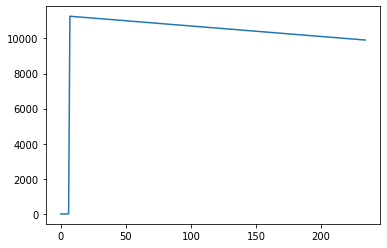

In [33]:
plt.plot(cons_long[38775])
#plt.plot(cons_1853[2258])
#plt.plot(cons[2274])
#plt.plot(cons[99538])
#plt.plot(cons_sav[99538])
#plt.plot(cons_sav[21910])

Long recovery periods have poor households with high shares of income from capital.

In [11]:
survey.loc[survey['reco_time_sev']==0]

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1     hhid  \
2766          2766          2766            2766           18336.0  18336.0   
11367        11367         11367           11367           38191.0  38191.0   
15497        15497         15497           15497           38191.0  38191.0   
22537        22537         22537           22537           28772.0  28772.0   
23216        23216         23216           23216           13702.0  13702.0   
...            ...           ...             ...               ...      ...   
296662      296662        296662          296662           31793.0  31793.0   
297495      297495        297495          297495           32828.0  32828.0   
302397      302397        302397          302397             950.0    950.0   
303176      303176        303176          303176           34156.0  34156.0   
303384      303384        303384          303384           34364.0  34364.0   

        region  weight  decile  n_individuals    income  ...  centroid_id  \
2766      15.0     1.0     2.0            7.5   78400.0  ...     107511.0   
11367     13.0     1.0    10.0            2.5  822150.0  ...        321.0   
15497     13.0     1.0    10.0            2.5  822150.0  ...        351.0   
22537      1.0     1.0     2.0            5.0   76730.0  ...      43677.0   
23216      1.0     1.0     2.0            5.0   79117.0  ...      46409.0   
...        ...     ...     ...            ...       ...  ...          ...   
296662    12.0     1.0     3.0            2.0  111510.0  ...      14423.0   
297495    12.0     1.0     2.0            5.0   79805.0  ...      14612.0   
302397    16.0     1.0     2.0            6.0   92555.0  ...      26415.0   
303176    16.0     1.0     8.0            4.0  317438.0  ...      27805.0   
303384    16.0     1.0     2.0            6.5   86632.0  ...      34378.0   

        n_copied  hh_instance   fhhid  n_events  reco_time_sev  \
2766         0.0          1.0    2766       1.0            0.0   
11367        0.0          1.0   11367       6.0            0.0   
15497        1.0          2.0   15497       3.0            0.0   
22537        0.0          1.0   22537       5.0            0.0   
23216        1.0          2.0   23216       1.0            0.0   
...          ...          ...     ...       ...            ...   
296662       1.0          2.0  296662       4.0            0.0   
297495       1.0          2.0  297495       3.0            0.0   
302397       0.0          1.0  302397       1.0            0.0   
303176       0.0          1.0  303176       1.0            0.0   
303384       0.0          1.0  303384       1.0            0.0   

        reco_time_sev_sav  share_sp  reco_time_mev  reco_time_mev_sav  
2766                  0.0      92.0            0.0                0.0  
11367                 0.0     100.0            0.0                0.0  
15497                 0.0     100.0            0.0                0.0  
22537                 0.0      72.0          197.0              182.0  
23216                 0.0      39.0            0.0                0.0  
...                   ...       ...            ...                ...  
296662                0.0      97.0            0.0                0.0  
297495                0.0      90.0            0.0                0.0  
302397                0.0      65.0            0.0                0.0  
303176                0.0      96.0            0.0                0.0  
303384                0.0      50.0            0.0                0.0  

[112 rows x 27 columns]

In [16]:
cons_sav=pd.read_csv('/home/insauer/mnt/ebm/inga/hhwb/data/output_shocks_single/cons_sm.csv', usecols=[2766,15497, 303384], header = None)
cons=pd.read_csv('/home/insauer/mnt/ebm/inga/hhwb/data/output_shocks_single/cons.csv', usecols=[2766, 15497, 303384], header=None)

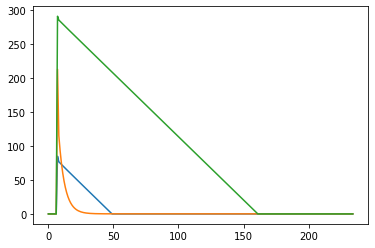

In [20]:
plt.plot(cons[2766])
plt.plot(cons[15497])
plt.plot(cons[303384])

The consumption loss just never reaches 5%
consumtion before shock:78400/13
maximum consumption loss: ~300

In [21]:
300/(78400/13)

0.04974489795918367

Independently from the recovery path the consumptionloss stays quite low.(4.97% < 5%)

Zero recovery times have households with extremely high income shares from social spendings (the consumption is never below 95%)

In [22]:
survey.loc[survey['reco_time_sev']==1]

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1  Unnamed: 0.1.1.1     hhid  \
22066        22066         22066           22066           28301.0  28301.0   
22192        22192         22192           22192           28427.0  28427.0   
26762        26762         26762           26762           28301.0  28301.0   
26888        26888         26888           26888           28427.0  28427.0   
31458        31458         31458           31458           28301.0  28301.0   
31584        31584         31584           31584           28427.0  28427.0   
33806        33806         33806           33806           28301.0  28301.0   
33932        33932         33932           33932           28427.0  28427.0   
36154        36154         36154           36154           28301.0  28301.0   
36280        36280         36280           36280           28427.0  28427.0   
38502        38502         38502           38502           28301.0  28301.0   
38628        38628         38628           38628           28427.0  28427.0   
40976        40976         40976           40976           28427.0  28427.0   
95155        95155         95155           95155           34581.0  34581.0   
111340      111340        111340          111340           34581.0  34581.0   
114577      114577        114577          114577           34581.0  34581.0   
117814      117814        117814          117814           34581.0  34581.0   
121051      121051        121051          121051           34581.0  34581.0   
124288      124288        124288          124288           34581.0  34581.0   
127525      127525        127525          127525           34581.0  34581.0   
130762      130762        130762          130762           34581.0  34581.0   
133999      133999        133999          133999           34581.0  34581.0   
140473      140473        140473          140473           34581.0  34581.0   
156658      156658        156658          156658           34581.0  34581.0   
166369      166369        166369          166369           34581.0  34581.0   
169606      169606        169606          169606           34581.0  34581.0   
172843      172843        172843          172843           34581.0  34581.0   
176080      176080        176080          176080           34581.0  34581.0   
179317      179317        179317          179317           34581.0  34581.0   
182554      182554        182554          182554           34581.0  34581.0   
185791      185791        185791          185791           34581.0  34581.0   
189028      189028        189028          189028           34581.0  34581.0   
192265      192265        192265          192265           34581.0  34581.0   
195502      195502        195502          195502           34581.0  34581.0   
201976      201976        201976          201976           34581.0  34581.0   
205213      205213        205213          205213           34581.0  34581.0   
208450      208450        208450          208450           34581.0  34581.0   
211687      211687        211687          211687           34581.0  34581.0   
214924      214924        214924          214924           34581.0  34581.0   
218161      218161        218161          218161           34581.0  34581.0   
221398      221398        221398          221398           34581.0  34581.0   
224635      224635        224635          224635           34581.0  34581.0   
227872      227872        227872          227872           34581.0  34581.0   
231109      231109        231109          231109           34581.0  34581.0   
234346      234346        234346          234346           34581.0  34581.0   
237583      237583        237583          237583           34581.0  34581.0   
240820      240820        240820          240820           34581.0  34581.0   
244057      244057        244057          244057           34581.0  34581.0   
247294      247294        247294          247294           34581.0  34581.0   
256929      256929        256929          256929          

In [30]:
cons_sav=pd.read_csv('/home/insauer/mnt/ebm/inga/hhwb/data/output_shocks_single/cons_sm.csv', usecols=[22066,26888,224635], header = None)
cons=pd.read_csv('/home/insauer/mnt/ebm/inga/hhwb/data/output_shocks_single/cons.csv', usecols=[22066, 26888,224635], header=None)

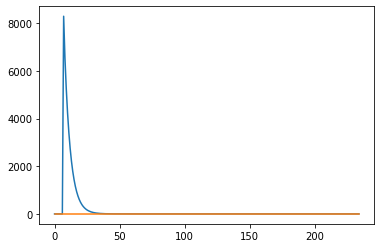

In [31]:
plt.plot(cons[26888])
plt.plot(cons_sav[26888])

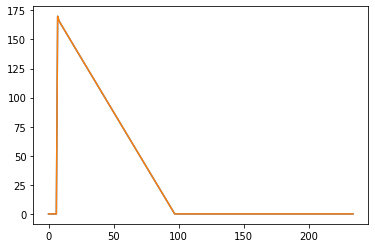

In [32]:
plt.plot(cons[224635])
plt.plot(cons_sav[224635])

In [15]:
170/(43733/13)

0.05053392175245239

Short recovery times have households with extremely high income shares from social spendings (the consumption is never below 95%)

In [18]:
deciles=list(set(survey['pcinc_decile']))
deciles

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [23]:
time_means_sev_1853=[]
time_means_sev_3339=[]
for i, dec in enumerate(deciles):
    time_means_sev_1853.append(survey.loc[survey['decile']==dec,'reco_time_sev_1853'].mean())
    time_means_sev_3339.append(survey.loc[survey['decile']==dec,'reco_time_sev_3339'].mean())


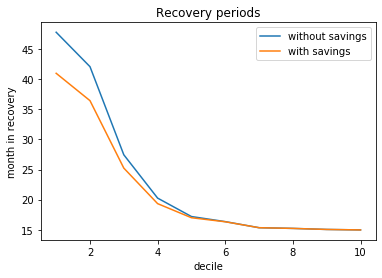

In [24]:
plt.plot(deciles, time_means_sev_1853, label='without savings')
plt.plot(deciles, time_means_sev_3339, label='with savings')
plt.title('Recovery periods')
plt.xlabel('decile')
plt.ylabel('month in recovery')
plt.legend()

In [12]:
survey['share_sp']= np.round((survey['income_sp']/survey['income'])*100)
survey

Unnamed: 0  Unnamed: 0.1  Unnamed: 0.1.1    hhid  region    weight  \
0                0             0          2150.0  2150.0    15.0  282.6768   
1                1             1          2151.0  2151.0    15.0  282.6768   
2                2             2          2152.0  2152.0    15.0  282.6768   
3                3             3          2153.0  2153.0    15.0  282.6768   
4                4             4          2154.0  2154.0    15.0  282.6768   
...            ...           ...             ...     ...     ...       ...   
303593      303593        303593           364.0   364.0    16.0    1.0000   
303594      303594        303594           365.0   365.0    16.0    1.0000   
303595      303595        303595           366.0   366.0    16.0    1.0000   
303596      303596        303596           367.0   367.0    16.0    1.0000   
303597      303597        303597           368.0   368.0    16.0    1.0000   

        decile  n_individuals    income  income_sp  ...  ispoor  \
0          6.0            8.5  181042.0     5600.0  ...     0.0   
1          4.0            8.5  145082.0        0.0  ...     1.0   
2          3.0            5.0  118355.0    12000.0  ...     0.0   
3          4.0            6.0  141114.0    11200.0  ...     0.0   
4          3.0            6.0  109872.0    11800.0  ...     1.0   
...        ...            ...       ...        ...  ...     ...   
303593     9.0            4.0  370960.0        0.0  ...     0.0   
303594     2.0            4.5   90946.0    27500.0  ...     1.0   
303595     1.0            1.0   23253.0        0.0  ...     0.0   
303596     5.0            8.0  172427.0        0.0  ...     0.0   
303597     1.0            3.5   59415.0        0.0  ...     1.0   

        subsistence_line  centroid_id  n_copied  hh_instance   fhhid  \
0             135370.940         -1.0       1.0          0.0       0   
1             135370.940         -1.0       1.0          0.0       1   
2              79629.970         -1.0       1.0          0.0       2   
3              95555.960         -1.0       1.0          0.0       3   
4              95555.960         -1.0       1.0          0.0       4   
...                  ...          ...       ...          ...     ...   
303593         63703.973      46745.0       1.0          2.0  303593   
303594         71666.970      46745.0       1.0          2.0  303594   
303595         15925.993      46745.0       1.0          2.0  303595   
303596        127407.945      46745.0       1.0          2.0  303596   
303597         55740.977      46745.0       1.0          2.0  303597   

        n_events  reco_time_sev  reco_time_sev_sav  share_sp  
0            0.0            NaN                NaN       3.0  
1            0.0            NaN                NaN       0.0  
2            0.0            NaN                NaN      10.0  
3            0.0            NaN                NaN       8.0  
4            0.0            NaN                NaN      11.0  
...          ...            ...                ...       ...  
303593       0.0            NaN                NaN       0.0  
303594       0.0            NaN                NaN      30.0  
303595       0.0            NaN                NaN       0.0  
303596       0.0            NaN                NaN       0.0  
303597       0.0            NaN                NaN       0.0  

[303598 rows x 24 columns]

(array([5.7258e+04, 1.2619e+04, 8.3440e+03, 6.4520e+03, 5.9260e+03,
        6.0210e+03, 4.7960e+03, 4.1030e+03, 4.3810e+03, 3.9310e+03,
        3.4530e+03, 3.3840e+03, 2.7570e+03, 3.0930e+03, 2.8570e+03,
        2.2620e+03, 1.9190e+03, 1.8890e+03, 1.5440e+03, 1.7330e+03,
        1.5010e+03, 1.0790e+03, 1.1280e+03, 1.1690e+03, 1.0790e+03,
        1.0940e+03, 1.1150e+03, 7.5300e+02, 5.3100e+02, 7.9200e+02,
        5.3700e+02, 5.7700e+02, 7.8100e+02, 7.5200e+02, 6.3900e+02,
        5.7200e+02, 6.1700e+02, 4.1400e+02, 6.1200e+02, 4.5900e+02,
        3.3300e+02, 3.5400e+02, 3.2800e+02, 2.4700e+02, 1.9100e+02,
        4.1900e+02, 2.9500e+02, 2.6900e+02, 1.9700e+02, 3.2700e+02,
        2.2300e+02, 3.6900e+02, 1.7100e+02, 1.7400e+02, 2.7600e+02,
        3.2300e+02, 1.3800e+02, 2.4300e+02, 2.0400e+02, 1.0200e+02,
        1.2800e+02, 1.8700e+02, 6.3000e+01, 1.7400e+02, 2.0600e+02,
        1.1300e+02, 1.8200e+02, 1.1500e+02, 1.1300e+02, 9.9000e+01,
        4.8000e+01, 2.5600e+02, 1.5500e+02, 3.60

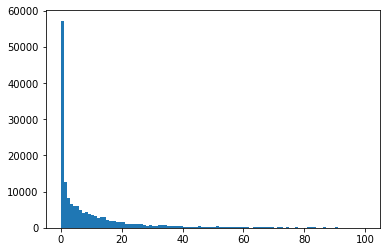

In [13]:
plt.hist(survey.loc[survey['n_events']!=0,'share_sp'],bins=100)

In [37]:
shares=list(set(survey['share_sp']))
shares

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0]

In [43]:
share_means=[]
share_means_sm=[]
for i, sh in enumerate(shares):
    share_means.append(survey.loc[(survey['n_events']!=0) & (survey['share_sp']==sh), 'reco_time_sev'].mean())
    share_means_sm.append(survey.loc[(survey['n_events']!=0) & (survey['share_sp']==sh), 'reco_time_sev_sav'].mean())  
len(share_means_sm)

101

In [20]:
shares_per_decile=[]
for i, dec in enumerate(deciles):
    share=survey.loc[survey['decile']==dec,'share_sp']*survey.loc[survey['decile']==dec,'weight']
    share=share.sum()/survey.loc[survey['decile']==dec,'weight'].sum()
    shares_per_decile.append(share)

Text(0, 0.5, 'share of social spendings')

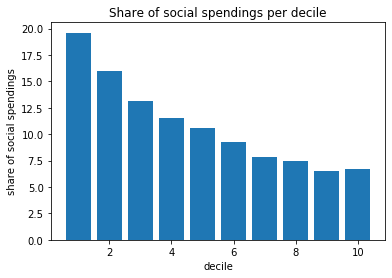

In [21]:
plt.bar(deciles, shares_per_decile)
plt.title('Share of social spendings per decile')
plt.xlabel('decile')
plt.ylabel('share of social spendings')


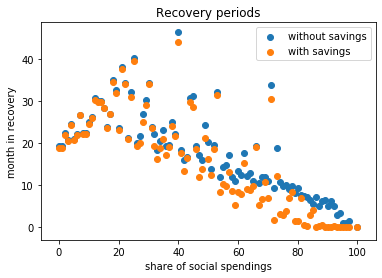

In [22]:
plt.scatter(shares, share_means, label='without savings')
plt.scatter(shares, share_means_sm, label='with savings')
plt.title('Recovery periods')
plt.xlabel('share of social spendings')
plt.ylabel('month in recovery')
plt.legend()

In [23]:
import numpy as np
col=0
add=10000
while add > 0:
    print(col)
    cols=ids_aff[col:col+add]
    cons_list=list(survey.loc[survey['fhhid'].isin(cols),'income']/13)
    df=pd.read_csv('/home/insauer/mnt/ebm/inga/hhwb/data/output_shocks/cons.csv', usecols=cols, header=None)
    
    for i,hhid in enumerate(cols):
        print(hhid)
        survey.loc[survey['fhhid']==hhid,'reco_time_mev']=np.array(cons_list[i]-df.loc[:,hhid]<0.95*cons_list[i]).sum()
    #df1=pd.read_csv('/home/mnt/ebm/inga/hhwb/data/output_shocks/wb_sm.csv', usecols=cols, header=None)
    #survey.loc[survey['fhhid'].isin(cols),'wb_loss_sm']= df1.max()
    #print(df.max())
    if col+add>=len(ids_aff):
        add=len(ids_aff)-(col+add)
    else:
        add=10000
    col+=add

0
2249
2250
2253
2254
2256
2257
2258
2259
2260
2263
2265
2266
2267
2268
2269
2270
2271
2272
2273
2275
2276
2277
2279
2280
2281
2283
2284
2285
2286
2287
2288
2290
2291
2292
2293
2294
2295
2296
2297
2298
2299
2300
2301
2302
2303
2304
2305
2306
2307
2308
2309
2310
2311
2312
2313
2314
2315
2316
2317
2318
2319
2320
2321
2322
2323
2324
2325
2326
2327
2328
2329
2330
2331
2332
2333
2334
2335
2336
2337
2338
2339
2340
2341
2342
2343
2344
2345
2346
2347
2348
2349
2350
2351
2352
2353
2354
2355
2356
2357
2358
2359
2360
2361
2362
2363
2364
2365
2366
2367
2368
2369
2370
2371
2372
2373
2374
2375
2376
2377
2378
2379
2380
2381
2382
2383
2384
2385
2386
2387
2388
2389
2390
2391
2392
2393
2394
2395
2396
2397
2398
2399
2400
2401
2402
2403
2404
2405
2406
2407
2408
2409
2410
2411
2412
2413
2414
2415
2416
2417
2418
2419
2420
2421
2422
2423
2424
2425
2426
2427
2428
2429
2430
2431
2432
2433
2434
2435
2436
2437
2438
2439
2440
2441
2442
2443
2444
2445
2446
2447
2450
2451
2452
2453
2454
2455
2456
2457
2458
2459
246

9995
9996
9997
9998
9999
10000
10001
10002
10003
10004
10005
10006
10007
10008
10009
10010
10011
10012
10013
10014
10015
10016
10017
10018
10019
10020
10021
10022
10023
10024
10025
10026
10027
10028
10029
10030
10031
10032
10033
10034
10035
10036
10037
10038
10039
10040
10041
10042
10043
10044
10045
10046
10047
10048
10049
10050
10051
10052
10053
10054
10055
10056
10057
10058
10059
10060
10061
10062
10063
10064
10065
10066
10067
10068
10069
10070
10071
10072
10073
10074
10075
10076
10077
10078
10079
10080
10081
10082
10083
10084
10085
10086
10087
10088
10089
10090
10091
10092
10093
10094
10095
10096
10097
10098
10099
10100
10101
10102
10103
10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
101

11420
11421
11422
11423
11424
11425
11426
11427
11428
11429
11430
11431
11432
11433
11434
11435
11436
11437
11438
11439
11440
11441
11442
11443
11444
11445
11446
11447
11448
11449
11450
11451
11452
11453
11454
11455
11456
11457
11458
11459
11460
11461
11462
11463
11464
11465
11466
11467
11468
11469
11470
11471
11472
11473
11474
11475
11476
11477
11478
11479
11480
11481
11482
11483
11484
11485
11486
11487
11488
11489
11490
11491
11492
11493
11494
11495
11496
11497
11498
11499
11500
11501
11502
11503
11504
11505
11506
11507
11508
11509
11510
11511
11512
11513
11514
11515
11516
11517
11518
11519
11520
11521
11522
11523
11524
11525
11526
11527
11528
11529
11530
11531
11532
11533
11534
11535
11536
11537
11538
11539
11540
11541
11542
11543
11544
11545
11546
11547
11548
11549
11550
11551
11552
11553
11554
11555
11556
11557
11558
11559
11560
11561
11562
11563
11564
11565
11566
11567
11568
11569
11570
11571
11572
11573
11574
11575
11576
11577
11578
11579
11580
11581
11582
11583
11584
11585
1158

12802
12803
12804
12805
12806
12807
12808
12809
12810
12811
12812
12813
12814
12815
12816
12817
12818
12819
12820
12821
12822
12823
12824
12825
12826
12827
12828
12829
12830
12831
12832
12833
12834
12835
12836
12837
12838
12839
12840
12841
12842
12843
12844
12845
12846
12847
12848
12849
12850
12851
12852
12853
12854
12855
12856
12857
12858
12859
12860
12861
12862
12863
12864
12865
12866
12867
12868
12869
12870
12871
12872
12873
12874
12875
12876
12877
12878
12879
12880
12881
12882
12883
12884
12885
12886
12887
12888
12889
12890
12891
12892
12893
12894
12895
12896
12897
12898
12899
12900
12901
12902
12903
12904
12905
12906
12907
12908
12909
12910
12911
12912
12913
12914
12915
12916
12917
12918
12919
12920
12921
12922
12923
12924
12925
12926
12927
12928
12929
12930
12931
12932
12933
12934
12935
12936
12937
12938
12939
12940
12941
12942
12943
12944
12945
12946
12947
12948
12949
12950
12951
12952
12953
12954
12955
12956
12957
12958
12959
12960
12961
12962
12963
12964
12965
12966
12967
1296

14175
14176
14177
14178
14179
14180
14181
14182
14183
14184
14185
14186
14187
14188
14189
14190
14191
14192
14193
14194
14195
14196
14197
14198
14199
14200
14201
14202
14203
14204
14205
14206
14207
14208
14209
14210
14211
14212
14213
14214
14215
14216
14217
14218
14219
14220
14221
14222
14223
14224
14225
14226
14227
14228
14229
14230
14231
14232
14233
14234
14235
14236
14237
14238
14239
14240
14241
14242
14243
14244
14245
14246
14247
14248
14249
14250
14251
14252
14253
14254
14255
14256
14257
14258
14259
14260
14261
14262
14263
14264
14265
14266
14267
14268
14269
14270
14271
14272
14273
14274
14275
14276
14277
14278
14279
14280
14281
14282
14283
14284
14285
14286
14287
14288
14289
14290
14291
14292
14293
14294
14295
14296
14297
14298
14299
14300
14301
14302
14303
14304
14305
14306
14307
14308
14309
14310
14311
14312
14313
14314
14315
14316
14317
14318
14319
14320
14321
14322
14323
14324
14325
14326
14327
14328
14329
14330
14331
14332
14333
14334
14335
14336
14337
14338
14339
14340
1434

15558
15559
15560
15561
15562
15563
15564
15565
15566
15567
15568
15569
15570
15571
15572
15573
15574
15575
15576
15577
15578
15579
15580
15581
15582
15583
15584
15585
15586
15587
15588
15589
15590
15591
15592
15593
15594
15595
15596
15597
15598
15599
15600
15601
15602
15603
15604
15605
15606
15607
15608
15609
15610
15611
15612
15613
15614
15615
15616
15617
15618
15619
15620
15621
15622
15623
15624
15625
15626
15627
15628
15629
15630
15631
15632
15633
15634
15635
15636
15637
15638
15639
15640
15641
15642
15643
15644
15645
15646
15647
15648
15649
15650
15651
15652
15653
15654
15655
15656
15657
15658
15659
15660
15661
15662
15663
15664
15665
15666
15667
15668
15669
15670
15671
15672
15673
15674
15675
15676
15677
15678
15679
15680
15681
15682
15683
15684
15685
15686
15687
15688
15689
15690
15691
15692
15693
15694
15695
15696
15697
15698
15699
15700
15701
15702
15703
15704
15705
15706
15707
15708
15709
15710
15711
15712
15713
15714
15715
15716
15717
15718
15719
15720
15721
15722
15723
1572

21885
21886
21887
21888
21889
21890
21891
21892
21895
21903
21904
21905
21906
21907
21908
21909
21910
21911
21912
21913
21914
21915
21916
21917
21918
21919
21920
21921
21922
21923
21924
21925
21926
21927
21928
21929
21930
21931
21932
21933
21934
21935
21936
21937
21938
21939
21940
21941
21942
21943
21944
21945
21946
21947
21948
21949
21950
21951
21952
21953
21954
21955
21956
21957
21958
21959
21960
21961
21962
21963
21964
21965
21966
21967
21968
21969
21970
21971
21972
21973
21974
21975
21976
21977
21978
21979
21980
21981
21982
21983
21984
21985
21986
21987
21988
21989
21990
21991
21992
21993
21994
21995
21996
21997
21998
21999
22000
22001
22002
22003
22004
22005
22006
22007
22008
22009
22010
22011
22012
22013
22014
22015
22016
22017
22018
22019
22020
22021
22022
22023
22024
22025
22026
22027
22028
22029
22030
22031
22032
22033
22034
22035
22036
22037
22038
22039
22040
22041
22042
22043
22044
22045
22046
22047
22048
22049
22050
22051
22052
22053
22054
22055
22056
22057
22058
22059
2206

25099
25101
25102
25103
25104
25105
25106
25107
25108
25109
25110
25111
25112
25113
25114
25115
10000
25117
25118
25119
25120
25123
25124
25125
25126
25127
25128
25129
25130
25131
25132
25133
25134
25135
25136
25137
25139
25140
25141
25142
25144
25145
25148
25149
25150
25152
25154
25156
25157
25158
25159
25160
25161
25162
25163
25164
25165
25166
25170
25171
25172
25173
25174
25175
25176
25177
25178
25179
25180
25181
25184
25185
25186
25187
25188
25190
25191
25192
25194
25195
25196
25197
25198
25199
25200
25201
25202
25203
25204
25207
25208
25209
25210
25211
25212
25213
25214
25216
25218
25219
25223
25224
25225
25226
25227
25229
25230
25232
25233
25234
25235
25236
25237
25238
25239
25240
25241
25242
25243
25244
25245
25246
25248
25249
25250
25251
25252
25253
25254
25256
25257
25260
25261
25263
25276
25279
25287
25289
25290
25292
25295
25296
25298
25300
25302
25305
25311
25316
25320
25324
25326
25338
25339
25340
25348
25349
25351
25353
25354
25358
25361
25368
25369
25376
25377
25379
2538

26901
26902
26903
26904
26905
26906
26907
26908
26909
26910
26911
26912
26913
26914
26915
26916
26917
26918
26919
26920
26921
26922
26923
26924
26925
26926
26927
26928
26929
26930
26931
26932
26933
26934
26935
26936
26937
26938
26939
26940
26941
26942
26943
26944
26945
26946
26947
26948
26949
26950
26951
26952
26953
26954
26955
26956
26957
26958
26959
26960
26961
26962
26963
26964
26965
26966
26967
26968
26969
26970
26971
26972
26973
26974
26975
26976
26977
26978
26979
26980
26981
26982
26983
26984
26985
26986
26987
26988
26989
26990
26991
26992
26993
26994
26995
26996
26997
26998
26999
27000
27001
27002
27003
27004
27005
27006
27007
27008
27009
27010
27011
27012
27013
27014
27015
27016
27017
27018
27019
27020
27021
27022
27023
27024
27025
27026
27027
27028
27029
27030
27031
27032
27033
27034
27035
27036
27037
27038
27039
27040
27041
27042
27043
27044
27045
27046
27047
27048
27049
27050
27051
27052
27053
27054
27055
27056
27057
27058
27059
27060
27061
27062
27063
27064
27065
27066
2706

28325
28326
28327
28328
28329
28330
28331
28332
28333
28334
28335
28336
28337
28338
28339
28340
28341
28342
28343
28344
28345
28346
28347
28348
28349
28350
28351
28352
28353
28354
28355
28356
28357
28358
28359
28360
28361
28362
28363
28364
28365
28366
28367
28368
28369
28370
28371
28372
28373
28374
28375
28376
28377
28378
28379
28380
28381
28382
28383
28384
28385
28386
28387
28388
28389
28390
28391
28392
28393
28394
28395
28396
28397
28398
28399
28400
28401
28402
28403
28404
28405
28406
28407
28408
28409
28410
28411
28412
28413
28414
28415
28416
28417
28418
28419
28420
28421
28422
28423
28424
28425
28426
28427
28428
28429
28430
28431
28432
28433
28434
28435
28436
28437
28438
28439
28440
28441
28442
28443
28444
28445
28446
28447
28448
28449
28450
28451
28452
28453
28454
28455
28456
28457
28458
28459
28460
28461
28462
28463
28464
28465
28466
28467
28468
28469
28470
28471
28472
28473
28474
28475
28476
28477
28478
28479
28480
28481
28482
28483
28484
28485
28486
28487
28488
28489
28490
2849

30580
30581
30582
30583
30584
30585
30586
30587
30588
30589
30590
30591
30592
30593
30594
30595
30596
30597
30598
30599
30600
30601
30602
30603
30604
30605
30606
30607
30608
30609
30610
30611
30612
30613
30614
30615
30616
30617
30618
30619
30620
30621
30622
30623
30624
30625
30626
30627
30628
30629
30630
30631
30632
30633
30634
30635
30636
30637
30638
30639
30640
30641
30642
30643
30644
30645
30646
30647
30648
30649
30650
30651
30652
30653
30654
30655
30656
30657
30658
30659
30660
30661
30662
30663
30664
30665
30666
30667
30668
30669
30670
30671
30672
30673
30674
30675
30676
30677
30678
30679
30680
30681
30682
30683
30684
30685
30686
30687
30688
30689
30690
30691
30692
30693
30694
30695
30696
30697
30698
30699
30700
30701
30702
30703
30704
30705
30706
30707
30708
30709
30710
30711
30712
30713
30714
30715
30716
30717
30718
30719
30720
30721
30722
30723
30724
30725
30726
30727
30728
30729
30730
30731
30732
30733
30734
30735
30736
30737
30738
30739
30740
30741
30742
30743
30744
30745
3074

31989
31990
31991
31992
31993
31994
31995
31996
31997
31998
31999
32000
32001
32002
32003
32004
32005
32006
32007
32008
32009
32010
32011
32012
32013
32014
32015
32016
32017
32018
32019
32020
32021
32022
32023
32024
32025
32026
32027
32028
32029
32030
32031
32032
32033
32034
32035
32036
32037
32038
32039
32040
32041
32042
32043
32044
32045
32046
32047
32048
32049
32050
32051
32052
32053
32054
32055
32056
32057
32058
32059
32060
32061
32062
32063
32064
32065
32066
32067
32068
32069
32070
32071
32072
32073
32074
32075
32076
32077
32078
32079
32080
32081
32082
32083
32084
32085
32086
32087
32088
32089
32090
32091
32092
32093
32094
32095
32096
32097
32098
32099
32100
32101
32102
32103
32104
32105
32106
32107
32108
32109
32110
32111
32112
32113
32114
32115
32116
32117
32118
32119
32120
32121
32122
32123
32124
32125
32126
32127
32128
32129
32136
32144
32147
32159
32175
32189
32193
32202
32208
32216
32218
32232
32241
32271
32284
32290
32305
32313
32316
32329
32337
32338
32364
32367
32373
3238

34202
34203
34207
34208
34210
34211
34212
34215
34217
34218
34219
34220
34221
34223
34224
34225
34227
34228
34230
34231
34232
34233
34235
34236
34237
34238
34239
34241
34242
34243
34244
34247
34248
34249
34250
34251
34252
34253
34254
34255
34256
34257
34258
34261
34262
34263
34264
34265
34267
34268
34269
34270
34271
34273
34274
34275
34276
34277
34278
34281
34283
34284
34286
34289
34290
34291
34293
34296
34297
34299
34300
34302
34303
34304
34305
34307
34308
34309
34310
34312
34314
34315
34317
34319
34320
34321
34322
34323
34324
34325
34326
34329
34331
34332
34333
34334
34335
34336
34337
34338
34339
34341
34345
34347
34349
34352
34355
34356
34357
34361
34365
34366
34370
34371
34374
34376
34377
34380
34382
34383
34384
34385
34386
34388
34389
34390
34393
34397
34398
34400
34401
34402
34405
34408
34409
34410
34411
34412
34413
34414
34415
34418
34419
34420
34421
34423
34424
34425
34427
34428
34429
34431
34432
34433
34434
34435
34436
34437
34439
34440
34441
34442
34443
34444
34445
34446
3445

36001
36002
36003
36004
36006
36007
36008
36009
36011
36012
36014
36016
36017
36018
36019
36020
36021
36022
36025
36026
36029
36030
36031
36032
36033
36036
36037
36038
36039
36040
36041
36042
36043
36044
36045
36046
36047
36048
36049
36050
36051
36052
36054
36056
36057
36058
36059
36060
36061
36062
36063
36064
36065
36066
36067
36069
36070
36072
36074
36075
36077
36078
36079
36081
36082
36083
36084
36085
36090
36091
36092
36093
36094
36095
36096
36097
36098
36099
36100
36101
36102
36106
36107
36108
36109
36110
36111
36112
36114
36115
36116
36117
36118
36119
36120
36121
36122
36123
36125
36127
36128
36129
36131
36132
36133
36134
36135
36136
36137
36138
36139
36140
36141
36144
36145
36147
36148
36149
36151
36152
36153
36154
36155
36156
36157
36161
36163
36164
36165
36167
36168
36171
36172
36173
36174
36175
36176
36177
36178
36179
36180
36181
36183
36184
36185
36186
36187
36188
36189
36191
36192
36193
36194
36195
36196
36197
36200
36201
36202
36203
36205
36206
36207
36208
36209
36210
3621

37641
37642
37643
37644
37645
37646
37647
37648
37649
37650
37651
37652
37653
37654
37655
37656
37657
37658
37659
37660
37661
37662
37663
37664
37665
37666
37667
37668
37669
37670
37671
37672
37673
37674
37675
37676
37677
37678
37679
37680
37681
37682
37683
37684
37685
37686
37687
37688
37689
37690
37691
37692
37693
37694
37695
37696
37697
37698
37699
37700
37701
37702
37703
37704
37705
37706
37707
37708
37709
37710
37711
37712
37713
37714
37715
37716
37717
37718
37719
37720
37721
37722
37723
37724
37725
37726
37727
37728
37729
37730
37731
37732
37733
37734
37735
37736
37737
37738
20000
37739
37740
37741
37742
37743
37744
37745
37746
37747
37748
37749
37750
37751
37752
37753
37754
37755
37756
37757
37758
37759
37760
37761
37762
37763
37764
37765
37766
37767
37768
37769
37770
37771
37772
37773
37774
37775
37776
37777
37778
37779
37780
37781
37782
37783
37784
37785
37786
37787
37788
37789
37790
37791
37792
37793
37794
37795
37796
37797
37798
37799
37800
37801
37802
37803
37804
37805
3780

40071
40072
40073
40074
40075
40077
40078
40079
40081
40084
40085
40086
40087
40092
40093
40095
40098
40099
40100
40101
40104
40106
40107
40108
40109
40111
40112
40113
40114
40119
40120
40121
40122
40123
40124
40125
40127
40129
40130
40131
40135
40136
40138
40139
40140
40141
40142
40144
40145
40146
40147
40149
40150
40155
40157
40158
40159
40160
40161
40162
40163
40164
40165
40166
40168
40169
40170
40171
40172
40173
40176
40177
40178
40179
40181
40184
40185
40187
40190
40192
40193
40194
40196
40198
40199
40200
40203
40204
40205
40206
40209
40210
40211
40212
40213
40214
40216
40217
40218
40219
40221
40222
40223
40225
40226
40227
40228
40231
40232
40233
40234
40235
40236
40238
40239
40240
40242
40243
40246
40247
40248
40250
40251
40252
40253
40256
40258
40259
40261
40262
40264
40265
40266
40267
40268
40269
40270
40271
40272
40273
40274
40275
40278
40279
40282
40284
40285
40286
40287
40288
40290
40291
40292
40293
40298
40301
40303
40304
40305
40307
40308
40309
40310
40311
40313
40314
4031

44241
44242
44243
44244
44245
44246
44247
44248
44249
44250
44251
44252
44253
44254
44255
44256
44257
44259
44263
44265
44280
44281
44282
44283
44284
44292
44293
44295
44297
44301
44313
44317
44318
44320
44322
44326
44329
44334
44341
44343
44345
44346
44347
44349
44353
44362
44366
44369
44370
44371
44372
44375
44377
44395
44407
44413
44418
44420
44424
44429
44431
44435
44438
44452
44453
44454
44463
44469
44471
44475
44492
44508
44511
44521
44525
44531
44537
44544
44564
44570
44572
44576
44599
44605
44621
44622
44640
44649
44653
44657
44676
44696
44703
44710
44713
44719
44723
44725
44728
44732
44733
44735
44740
44741
44742
44745
44748
44750
44752
44755
44758
44759
44762
44766
44768
44769
44770
44771
44772
44773
44779
44780
44781
44782
44783
44785
44786
44787
44791
44792
44798
44799
44800
44801
44802
44805
44806
44807
44810
44813
44816
44824
44825
44826
44844
44847
44857
44863
44886
44890
44905
44907
44913
44915
44928
44938
44940
44950
44951
44955
44963
44967
44968
44977
44978
44999
4502

49531
49532
49534
49537
49540
49541
49542
49543
49544
49545
49546
49551
49554
49555
49557
49562
49563
49564
49566
49567
49569
49570
49572
49575
49576
49578
49579
49581
49582
49584
49585
49586
49587
49588
49589
49590
49591
49592
49593
49594
49595
49596
49597
49598
49599
49601
49602
49603
49604
49605
49608
49609
49610
49611
49612
49613
49614
49615
49616
49617
49618
49619
49621
49622
49623
49624
49626
49627
49630
49631
49632
49633
49635
49636
49637
49640
49641
49643
49644
49645
49646
49647
49648
49649
49651
49652
49654
49655
49657
49659
49660
49661
49662
49663
49664
49665
49666
49668
49669
49670
49672
49673
49674
49677
49679
49680
49681
49682
49683
49684
49686
49687
49688
49689
49690
49692
49693
49696
49697
49699
49700
49702
49703
49704
49705
49706
49707
49708
49712
49713
49714
49716
49717
49719
49720
49721
49723
49724
49725
49726
49727
49728
49730
49731
49732
49734
49735
49736
49737
49739
49740
49741
49742
49744
49746
49747
49748
49749
49750
49753
49754
49757
49758
49759
49762
49764
4976

51680
51681
51682
51683
51684
51685
51686
51687
51689
51690
51692
51694
51695
51696
51697
51698
51699
51700
51702
51703
51704
51705
51707
51708
51709
51710
51711
51712
51715
51716
51717
51720
51721
51722
51723
51724
51725
51728
51730
51731
51732
51733
51734
51735
51736
51740
51741
51744
51745
51749
51751
51752
51753
51754
51755
51756
51757
51760
51761
51762
51763
51764
51765
51766
51767
51768
51769
51770
51771
51772
51773
51775
51776
51777
51778
51779
51780
51781
51782
51783
51784
51785
51787
51788
51790
51791
51792
51793
51794
51795
51796
51797
51798
51799
51800
51801
51802
51803
51804
51805
51806
51807
51808
51809
51810
51811
51812
51813
51814
51815
51816
51817
51818
51819
51820
51821
51822
51823
51824
51825
51826
51827
51828
51829
51830
51831
51832
51833
51834
51835
51836
51837
51838
51839
51840
51841
51842
51843
51844
51845
51846
51847
51848
51849
51850
51851
51852
51853
51854
51855
51856
51857
51858
51859
51860
51861
51862
51863
51864
51865
51866
51867
51868
51869
51870
51871
5187

54279
54280
54281
54282
54283
54284
54285
54286
54287
54288
54289
54290
54291
54292
54293
54294
54295
54296
54297
54298
54299
54300
54301
54302
54303
54304
54305
54306
54307
54308
54309
54310
54311
54312
54313
54314
54315
54316
54317
54318
54319
54320
54321
54322
54323
54324
54325
54326
54327
54328
54329
54330
54331
54332
54333
54334
54335
54336
54337
54338
54339
54340
54341
54342
54343
54344
54345
54346
54347
54348
54349
54350
54351
54352
54353
54354
54355
54356
54357
54358
54359
54360
54361
54362
54363
54364
54365
54366
54367
54368
54369
54370
54371
54372
54373
54374
54375
54376
54377
54378
54393
54417
54419
54424
54426
54451
54452
54453
54454
54455
54456
54457
54458
54459
54460
54461
54462
54463
54464
54465
54466
54467
54468
54469
54470
54471
54472
54473
54474
54475
54476
54477
54478
54479
54480
54481
54482
54483
54484
54485
54486
54487
54488
54489
54490
54491
54492
54493
54494
54495
54496
54497
54498
54499
54500
54501
54502
54503
54504
54505
54506
54507
54508
54509
54510
54511
5451

56259
56260
56261
56262
56263
56264
56265
56266
56267
56268
56269
56270
56271
56272
56273
56274
56275
56276
56277
56278
56279
56280
56281
56282
56283
56284
56285
56286
56287
56288
56289
56290
56291
56292
56293
56294
56295
56296
56297
56298
56299
56300
56301
56302
56303
56304
56305
56306
56307
56308
56309
56310
56311
56312
56313
56314
56315
56316
56317
56318
56319
56320
56321
56322
56323
56324
56325
56326
56327
56328
56329
56330
56331
56332
56333
56334
56335
56336
56337
56338
56339
56340
56341
56342
56343
56344
56345
56346
56347
56348
56349
56350
56351
56352
56353
56354
56355
56356
56357
56358
56359
56360
56361
56362
56363
56364
56365
56366
56367
56368
56369
56370
56371
56372
56373
56374
56375
56376
56377
56378
56379
56380
56381
56382
56383
56384
56385
56386
56387
56388
56389
56390
56391
56392
56393
56394
56395
56396
56397
56398
56399
56400
56401
56402
56403
56404
56405
56406
56407
56408
56409
56410
56411
56412
56413
56414
56415
56416
56417
56418
56419
56420
56421
56422
56423
56424
5642

58569
58570
58572
58573
58575
58576
58577
58578
58579
58580
58584
58585
58587
58588
58589
58590
58591
58592
58593
58594
58595
58597
58599
58600
58601
58602
58603
58604
58605
58606
58608
58609
58610
58611
58612
58613
58616
58618
58619
58622
58623
58625
58626
58627
58628
58629
58631
58632
58634
58635
58637
58639
58641
58643
58645
58646
58647
58648
58649
58650
58652
58654
58655
58656
58658
58659
58660
58661
58662
58663
58664
58665
58666
58667
58668
58670
58671
58672
58673
58674
58675
58680
58683
58684
58685
58688
58690
58691
58692
58693
58694
58697
58699
58701
58702
58704
58708
58709
58710
58711
58712
58713
58715
58716
58717
58723
58724
58725
58728
58730
58732
58734
58735
58736
58739
58741
58742
58743
58745
58746
58747
58748
58749
58750
58752
58754
58755
58756
58757
58758
58759
58760
58762
58763
58765
58768
58769
58770
58772
58774
58775
58776
58777
58778
58779
58780
58781
58782
58785
58786
58788
58790
58791
58792
58793
58794
58796
58797
58798
58799
58802
58803
58804
58807
58810
58811
5881

70675
70676
70678
70681
70682
70683
70687
70688
70689
70690
70692
70749
70798
70799
70812
70828
70834
70836
70844
70858
70867
70876
70894
70907
70927
70935
70951
70956
70958
70973
71008
71051
71103
71104
71127
71195
71197
71238
71311
71485
71512
71639
71664
71717
71757
71762
71800
71822
71924
71994
72047
72100
72160
72161
72163
72164
72166
72168
72169
72171
72172
72173
72174
72176
72177
72179
72180
72181
72182
72184
72185
72187
72188
72189
72190
72193
72194
72195
72196
72198
72199
72200
72201
72203
72205
72210
72212
72213
72214
72216
72217
72218
72219
72221
72222
72223
72225
72227
72228
72230
72231
72233
72239
72241
72242
72243
72245
72246
72247
72248
72250
72251
72252
72253
72254
72256
72259
72263
72265
72266
72267
72268
72269
72270
72272
72274
72277
72279
72280
72281
72283
72284
72285
72286
72287
72288
72290
72291
72292
72293
72294
72295
72296
72298
72301
72302
72303
72304
72308
72309
72319
72416
72668
72813
72960
72988
73053
73072
73097
73180
73198
73206
73215
73283
73347
73495
7356

92248
92249
92251
92252
92253
92255
92257
92259
92291
92304
92326
92327
92328
92330
92332
92333
92336
92338
92339
92341
92343
92345
92346
92347
92348
92350
92352
92353
92354
92355
92356
92357
92358
92359
92364
92365
92366
92367
92368
92369
92371
92372
92373
92374
92377
92381
92384
92385
92386
92387
92389
92391
92392
92393
92394
92395
92396
92398
92399
92401
92402
92403
92404
92405
92406
92407
92411
92412
92413
92414
92415
92416
92417
92418
92419
92421
92422
92425
92426
92427
92428
92429
92430
92431
92432
92433
92434
92436
92438
92439
92440
92442
92443
92447
92449
92451
92452
92453
92454
92455
92456
92457
92458
92459
92460
92461
92463
92465
92466
92468
92469
92470
92472
92473
92475
92476
92477
92478
92481
92482
92484
92485
92486
92487
92488
92489
92490
92492
92495
92496
92497
92500
92501
92502
92503
92504
92506
92507
92509
92510
92511
92512
92513
92514
92518
92519
92521
92524
92525
92526
92527
92528
92529
92530
92531
92532
92533
92535
92537
92538
92540
92542
92544
92545
92546
92547
9254

97387
97388
97389
97392
97393
97394
97396
97397
97399
97402
97403
97404
97405
97406
97407
97408
97409
97412
97413
97414
97416
97417
97418
97420
97421
97422
97423
97424
97425
97426
97427
97428
97429
97430
97431
97432
97433
97434
97435
97436
97437
97438
97439
97440
97441
97442
97443
97444
97445
97446
97447
97448
97449
97450
97451
97452
97453
97454
97455
97456
97457
97458
97459
97460
97461
97462
97463
97464
97465
97466
97467
97468
97469
97470
97471
97472
97473
97474
97475
97476
97477
97478
97479
97480
97481
97482
97483
97484
97485
97486
97487
97488
97489
97490
97491
97492
97493
97494
97495
97496
97497
97498
97499
97500
97501
97502
97503
97504
97505
97506
97507
97508
97509
97510
97511
97512
97513
97514
97515
97516
97517
97518
97519
97520
97521
97522
97523
97524
97525
97526
97527
97528
97529
97530
97531
97532
97533
97534
97535
97536
97537
97538
97539
97540
97541
97542
97543
97544
97545
97547
97548
97549
97553
97554
97555
97556
97557
97558
97559
97560
97564
97565
97566
97567
97569
97572
9757

104010
104011
104012
104013
104014
104015
104016
104017
104018
104019
104020
104021
104022
104023
104024
104025
104026
104027
104028
104029
104030
104031
104032
104033
104034
104035
104036
104037
104038
104039
104040
104041
104042
104043
104044
104045
104046
104047
104048
104049
104050
104051
104052
104053
104054
104055
104056
104057
104058
104059
104060
104061
104062
104063
104064
104065
104066
104067
104068
104069
104070
104071
104072
104073
104074
104075
104076
104077
104078
104079
104080
104081
104082
104083
104084
104085
104086
104087
104088
104089
104090
104091
104092
104093
104094
104095
104096
104097
104098
104099
104100
104101
104102
104103
104104
104105
104106
104107
104108
104109
104110
104111
104112
104113
104114
104115
104116
104117
104118
104119
104120
104121
104122
104123
104124
104125
104126
104127
104128
104129
104130
104131
104132
104133
104134
104135
104136
104137
104138
104139
104140
104141
104142
104143
104144
104145
104146
104147
104148
104149
104150
104151
104152

106240
106241
106242
106243
106244
106245
106246
106247
106248
106249
106250
106251
106252
106253
106254
106255
106256
106257
106258
106259
106260
106261
106262
106263
106264
106265
106266
106267
106268
106269
106270
106271
106272
106273
106274
106275
106276
106277
106278
106279
106280
106281
106282
106283
106284
106285
106286
106287
106288
106289
106290
106291
106292
106293
106294
106295
106296
106297
106298
106299
106300
106301
106302
106303
106304
106305
106306
106307
106308
106309
106310
106311
106312
106313
106314
106315
106316
106317
106318
106319
106320
106321
106322
106323
106324
106325
106326
106327
106328
106329
106330
106331
106332
106333
106334
106335
106336
106337
106338
106339
106340
106341
106342
106343
106344
106345
106346
106347
106348
106349
106350
106351
106352
106353
106354
106355
106356
106357
106358
106359
106360
106361
106362
106363
106364
106365
106366
106367
106368
106369
106370
106371
106372
106373
106374
106375
106376
106377
106378
106379
106380
106381
106382

107747
107748
107749
107750
107752
107755
107756
107757
107758
107760
107761
107762
107763
107764
107768
107769
107770
107771
107772
107774
107775
107776
107777
107778
107779
107780
107781
107782
107783
107784
107785
107786
107787
107788
107789
107790
107791
107792
107793
107794
107795
107796
107797
107798
107799
107800
107801
107802
107803
107804
107805
107806
107807
107808
107809
107810
107811
107812
107813
107814
107815
107816
107817
107818
107819
107820
107821
107822
107823
107824
107825
107826
107827
107828
107829
107830
107831
107832
107833
107834
107835
107836
107837
107838
107839
107840
107841
107842
107843
107844
107845
107846
107847
107848
107849
107850
107851
107852
107853
107854
107855
107856
107857
107858
107859
107860
107861
107862
107863
107864
107865
107866
107867
107868
107869
107870
107871
107872
107873
107874
107875
107876
107877
107878
107879
107880
107881
107882
107883
107884
107885
107886
107887
107888
107889
107890
107891
107892
107893
107894
107895
107896
107897

109721
109722
109723
109724
109725
109726
109727
109729
109731
109732
109733
109735
109737
109738
109740
109741
109742
109743
109747
109748
109749
109750
109751
109752
109755
109756
109758
109759
109760
109763
109764
109765
109766
109767
109796
109797
109820
109822
109824
109827
109845
109846
109847
109848
109849
109850
109851
109852
109853
109854
109855
109856
109857
109858
109859
109860
109861
109862
109863
109864
109865
109866
109867
109868
109869
109870
109871
109872
109873
109874
109875
109876
109877
109878
109879
109880
109881
109882
109883
109884
109885
109886
109887
109888
109889
109890
109891
109892
109893
109894
109895
109896
109897
109898
109899
109900
109901
109902
109903
109904
109905
109906
109907
109908
109909
109910
109911
109912
109913
109914
109915
109916
109917
109918
109919
109920
109921
109922
109923
109924
109925
109926
109927
109928
109929
109930
109931
109932
109933
109934
109935
109936
109937
109938
109939
109940
109941
109942
109943
109944
109945
109946
109947

111700
111702
111704
111705
111706
111707
111708
111709
111710
111711
111712
111713
111715
111716
111719
111720
111722
111723
111724
111726
111727
111728
111729
111730
111731
111733
111734
111736
111737
111738
111739
111742
111743
111744
111749
111750
111753
111756
111758
111760
111764
111765
111766
111771
111772
111773
111774
111775
111776
111778
111779
111780
111781
111782
111783
111784
111785
111786
111787
111788
111791
111792
111794
111795
111796
111797
111798
111799
111800
111801
111803
111812
111816
111819
111821
111823
111827
111831
111843
111849
111858
111859
111864
111885
111906
111913
111916
111918
111930
111935
111939
111944
111958
111960
111963
111965
111966
111967
111968
111970
111971
111972
111973
111974
111975
111978
111979
111981
111983
111984
111986
111987
111988
111989
111992
111993
111994
111995
111997
112000
112001
112003
112004
112005
112007
112008
112009
112010
112011
112013
112015
112016
112017
112018
112019
112021
112023
112024
112025
112026
112033
112034
112036

113414
113415
113416
113419
113420
113423
113424
113425
113426
113427
113429
113431
113432
113433
113436
113437
113438
113439
113440
113441
113442
113443
113445
113447
113449
113450
113453
113454
113457
113458
113459
113462
113464
113465
113466
113467
113468
113471
113473
113474
113475
113476
113478
113479
113480
113481
113485
113489
113490
113491
113492
113493
113494
113495
113496
113498
113499
113500
113501
113502
113504
113505
113506
113509
113511
113512
113513
113515
113516
113517
113518
113519
113522
113524
113525
113526
113527
113529
113531
113532
113533
113534
113535
113536
113538
113539
113540
113541
113542
113543
113545
113546
113549
113550
113551
113552
113553
113554
113555
113556
113557
113558
113559
113560
113561
113562
113563
113564
113565
113566
113567
113568
113569
113570
113571
113572
113573
113574
113575
113576
113577
113578
113579
113580
113581
113582
113583
113584
113585
113586
113587
113588
113590
113591
113592
113593
113596
113597
113599
113600
113601
113602
113603

115271
115272
115273
115274
115275
115276
115277
115278
115279
115280
115281
115282
115283
115284
115285
115286
115287
115288
115289
115290
115291
115292
115293
115294
115295
115296
115297
115298
115299
115300
115301
115302
115303
115304
115305
115306
115307
115308
115309
115310
115311
115312
115313
115314
115315
115316
115317
115318
115319
115320
115321
115322
115323
115324
115325
115326
115327
115328
115329
115330
115331
115332
115333
115334
115335
115336
115337
115338
115339
115340
115341
115342
115343
115344
115345
115346
115347
115348
115349
115350
115351
115352
115353
115354
115355
115356
115357
115358
115359
115360
115361
115362
115363
115364
115365
115366
115367
115368
115369
115370
115371
115372
115373
115374
115375
115376
115377
115378
115379
115380
115381
115382
115383
115384
115385
115386
115387
115388
115389
115390
115391
115392
115393
115394
115395
115396
115397
115398
115399
115400
115401
115402
115403
115404
115405
115406
115407
115408
115409
115410
115411
115412
115413

116734
116735
116736
116742
116743
116744
116746
116747
116748
116749
116751
116752
116753
116755
116757
116758
116759
116760
116761
116762
116763
116767
116769
116770
116771
116772
116774
116775
116776
116777
116778
116779
116782
116784
116786
116787
116789
116790
116792
116793
116794
116795
116796
116798
116799
116801
116803
116805
116808
116809
116810
116811
116812
116814
116815
116817
116818
116819
116820
116821
116822
116823
116824
116825
116826
116827
116829
116830
116831
116832
116835
116836
116838
116839
116840
116842
116843
116845
116846
116847
116848
116849
116850
116851
116852
116854
116855
116857
116859
116860
116861
116862
116863
116864
116865
116866
116867
116869
116871
116872
116873
116874
116875
116876
116877
116878
116879
116880
116881
116883
116885
116888
116890
116893
116894
116895
116896
116898
116899
116901
116902
116903
116905
116906
116908
116909
116911
116912
116913
116914
116915
116918
116919
116920
116921
116924
116926
116927
116929
116930
116932
116933
116934

118167
118168
118169
118170
118171
118172
118173
118174
118175
118176
118177
118178
118179
118180
118181
118182
118183
118184
118185
118186
118187
118188
118189
118190
118191
118192
118193
118194
118195
118196
118197
118198
118199
118200
118201
118202
118203
118204
118205
118206
118207
118208
118209
118210
118211
118212
118213
118214
118215
118216
118217
118218
118219
118220
118221
118222
118223
118224
118225
118226
118227
118228
118229
118230
118231
118232
118233
118234
118235
118236
118237
118238
118239
118240
118241
118242
118243
118244
118245
118246
118247
118248
118249
118250
118251
118252
118253
118254
118255
118256
118257
118258
118259
118260
118261
118262
118263
118264
118265
118266
118267
118268
118269
118270
118271
118272
118273
118274
118275
118276
118277
118278
118279
118280
118281
118282
118283
118284
118285
118286
118287
118288
118289
118290
118291
118292
118293
118294
118295
118296
118297
118298
118299
118300
118301
118302
118303
118304
118305
118306
118307
118308
118309

119469
119470
119471
119472
119473
119474
119475
119476
119477
119478
119479
119480
119481
119482
119483
119484
119485
119486
119487
119488
119489
119490
119491
119492
119493
119494
119495
119496
119497
119498
119499
119500
119501
119502
119503
119504
119505
119506
119507
119508
119509
119510
119511
119512
119513
119514
119515
119516
119517
119518
119519
119520
119521
119522
119523
119524
119525
119526
119527
119528
119529
119530
119531
119532
119533
119534
119535
119536
119537
119538
119539
119540
119541
119542
119543
119544
119545
119546
119547
119548
119549
119550
119551
119552
119553
119554
119555
119556
119557
119558
119559
119560
119561
119562
119563
119564
119565
119566
119567
119568
119569
119570
119571
119572
119573
119574
119575
119576
119577
119578
119579
119580
119581
119582
119583
119584
119585
119586
119587
119588
119589
119590
119591
119592
119593
119594
119595
119596
119597
119598
119599
119600
119601
119602
119603
119604
119605
119606
119607
119608
119609
119610
119611

120691
120692
120693
120694
120695
120696
120697
120698
120699
120700
120701
120702
120703
120704
120705
120706
120707
120708
120709
120710
120711
120712
120713
120714
120715
120716
120717
120718
120719
120720
120721
120722
120723
120724
120725
120726
120727
120728
120729
120730
120731
120732
120733
120734
120735
120736
120737
120738
120739
120740
120741
120742
120743
120744
120745
120746
120747
120748
120749
120750
120751
120752
120753
120754
120755
120756
120757
120758
120759
120760
120761
120762
120763
120764
120765
120766
120767
120768
120769
120770
120771
120772
120773
120774
120775
120776
120777
120778
120779
120780
120781
120782
120783
120784
120785
120786
120787
120788
120789
120790
120791
120792
120793
120794
120795
120796
120797
120798
120799
120800
120801
120802
120803
120804
120805
120806
120807
120808
120809
120810
120811
120812
120813
120814
120815
120816
120817
120818
120819
120820
120821
120822
120823
120824
120825
120826
120827
120828
120829
120830
120831
120832
120833

121938
121939
121940
121941
121942
121943
121944
121945
121946
121947
121948
121949
121950
121951
121952
121953
121954
121955
121956
121957
121958
121959
121960
121961
121962
121963
121964
121965
121966
121967
121968
121969
121970
121971
121972
121973
121974
121975
121976
121977
121978
121979
121980
121981
121982
121983
121984
121985
121986
121987
121988
121989
121990
121991
121992
121993
121994
121995
121996
121997
121998
121999
122000
122001
122002
122003
122004
122005
122006
122007
122008
122009
122010
122011
122012
122013
122014
122015
122016
122017
122018
122019
122020
122021
122022
122023
122024
122025
122026
122027
122028
122029
122030
122031
122032
122033
122034
122035
122036
122037
122038
122039
122040
122041
122042
122043
122044
122045
122046
122047
122048
122049
122050
122051
122052
122053
122054
122055
122056
122057
122058
122059
122060
122061
122062
122063
122064
122065
122066
122067
122068
122069
122070
122071
122072
122073
122074
122075
122076
122077
122078
122079
122080

123556
123557
123558
123559
123560
123561
123562
123563
123564
123565
123566
123567
123568
123569
123570
123571
123572
123573
123574
123575
123576
123577
123578
123579
123580
123581
123582
123583
123584
123585
123586
123587
123588
123589
123590
123591
123592
123593
123594
123595
123596
123597
123598
123599
123600
123601
123602
123603
123604
123605
123606
123607
123608
123609
123610
123611
123612
123613
123614
123615
123616
123617
123618
123619
123620
123621
123622
123623
123624
123625
123626
123627
123628
123629
123630
123631
123632
123633
123634
123635
123636
123637
123638
123639
123640
123641
123642
123643
123644
123645
123646
123647
123648
123649
123650
123651
123652
123653
123654
123655
123656
123657
123658
123659
123660
123661
123662
123663
123664
123665
123666
123667
123668
123669
123670
123671
123672
123673
123674
123675
123676
123677
123678
123679
123680
123681
123682
123683
123684
123685
123686
123687
123688
123689
123690
123691
123692
123693
123694
123695
123696
123697
123698

124774
124775
124776
124777
124778
124779
124780
124781
124782
124783
124784
124785
124786
124787
124788
124789
124790
124791
124792
124793
124794
124795
124796
124797
124798
124799
124800
124801
124802
124803
124804
124805
124806
124807
124808
124809
124810
124811
124812
124813
124814
124815
124816
124817
124818
124819
124820
124821
124822
124823
124824
124825
124826
124827
124828
124829
124830
124831
124832
124833
124834
124835
124836
124837
124838
124839
124840
124841
124842
124843
124844
124845
124846
124847
124848
124849
124850
124851
124852
124853
124854
124855
124856
124857
124858
124859
124860
124861
124862
124863
124864
124873
124899
124905
124925
124931
124963
124981
124996
125001
125005
125006
125007
125008
125009
125010
125011
125012
125013
125014
125015
125016
125017
125018
125019
125020
125021
125022
125023
125024
125025
125026
125027
125028
125029
125030
125031
125032
125033
125034
125035
125036
125037
125038
125039
125040
125041
125042
125043
125044
125045
125046
125047

126083
126084
126085
126086
126087
126088
126089
126090
126091
126092
126093
126094
126095
126096
126097
126098
126099
126100
126101
126102
126103
126104
126105
126106
126107
126108
126109
126110
126111
126112
126113
126114
126115
126116
126117
126118
126119
126120
126121
126122
126123
126124
126125
126126
126127
126128
126129
126130
126131
126132
126133
126134
126135
126136
126137
126138
126139
126140
126141
126142
126143
126144
126145
126146
126147
126148
126149
126150
126151
126152
126153
126154
126155
126156
126157
126158
126159
126160
126161
126162
126163
126164
126165
126166
126167
126168
126169
126170
126171
126172
126173
126174
126175
126176
126177
126178
126179
126180
126181
126182
126183
126184
126185
126186
126187
126188
126189
126190
126191
126192
126193
126194
126195
126196
126197
126198
126199
126200
126201
126202
126203
126204
126205
126206
126207
126208
126209
126210
126211
126212
126213
126214
126215
126216
126217
126218
126219
126220
126221
126222
126223
126224
126225

127393
127394
127395
127396
127397
127398
127399
127400
127401
127402
127403
127404
127408
127409
127410
127411
127413
127414
127417
127420
127423
127424
127425
127426
127429
127432
127435
127436
127437
127438
127439
127444
127445
127446
127447
127448
127450
127451
127452
127453
127454
127455
127456
127458
127459
127460
127461
127464
127465
127466
127467
127468
127469
127470
127471
127472
127473
127474
127475
127476
127477
127478
127479
127480
127481
127482
127483
127484
127485
127486
127487
127488
127489
127490
127491
127492
127493
127494
127495
127496
127497
127498
127499
127500
127501
127502
127503
127504
127505
127506
127507
127508
127509
127510
127511
127512
127513
127514
127515
127516
127517
127518
127519
127520
127521
127522
127523
127524
127525
127526
127527
127528
127529
127530
127531
127532
127533
127534
127535
127536
127537
127538
127539
127540
127541
127542
127543
127544
127545
127546
127547
127548
127549
127550
127551
127552
127553
127554
127555
127556
127557
127558
127559

128660
128661
128662
128663
128664
128665
128666
128667
128668
128669
128670
128672
128673
128675
128676
128678
128679
128682
128683
128684
128686
128687
128688
128689
128690
128691
128692
128693
128694
128695
128696
128697
128698
128699
128700
128701
128702
128703
128704
128705
128706
128707
128708
128709
128710
128711
128712
128713
128714
128715
128716
128717
128718
128719
128720
128721
128722
128723
128724
128725
128726
128727
128728
128729
128730
128731
128732
128733
128734
128735
128736
128737
128738
128739
128740
128741
128742
128743
128744
128745
128746
128747
128748
128749
128750
128751
128752
128753
128754
128755
128756
128757
128758
128759
128760
128761
128762
128763
128764
128765
128766
128767
128768
128769
128770
128771
128772
128773
128774
128775
128776
128777
128778
128779
128780
128781
128782
128783
128784
128785
128786
128787
128788
128789
128790
128791
128792
128793
128794
128795
128796
128797
128798
128799
128800
128801
128802
128803
128804
128805
128806
128807
128808

129924
129925
129926
129927
129928
129929
129930
129931
129933
129934
129935
129937
129938
129939
129940
129942
129943
129944
129945
129946
129947
129948
129949
129950
129951
129952
129953
129954
129955
129957
129959
129960
129962
129963
129964
129965
129966
129967
129968
129970
129972
129973
129976
129977
129978
129979
129982
129983
129984
129985
129986
129987
129988
129989
129990
129991
129992
129993
129995
129996
129998
129999
130000
130001
130002
130003
130006
130007
130008
130009
130011
130012
130013
130014
130015
130016
130017
130020
130021
130023
130025
130026
130027
130029
130030
130031
130032
130034
130035
130036
130038
130042
130044
130045
130047
130048
130049
130051
130053
130054
130055
130056
130057
130058
130059
130061
130062
130063
130064
130066
130067
130069
130070
130071
130073
130074
130075
130076
130077
130078
130079
130081
130082
130086
130087
130089
130090
130091
130092
130093
130094
130095
130097
130098
130099
130100
130102
130103
130104
130106
130107
130108
130109

131387
131388
131389
131390
131391
131393
131395
131396
131397
131398
131399
131400
131401
131404
131405
131406
131407
131408
131409
131410
131413
131415
131419
131420
131422
131423
131424
131427
131429
131430
131431
131432
131435
131436
131438
131439
131440
131441
131443
131444
131447
131448
131452
131453
131454
131455
131456
131458
131465
131466
131467
131468
131469
131470
131471
131472
131475
131477
131480
131481
131482
131483
131484
131486
131487
131488
131490
131491
131494
131495
131497
131498
131499
131501
131504
131505
131508
131510
131511
131512
131513
131517
131518
131520
131521
131522
131523
131524
131525
131526
131527
131528
131529
131530
131531
131534
131535
131538
131540
131542
131543
131544
131546
131547
131548
131551
131554
131556
131559
131562
131564
131567
131568
131569
131570
131571
131574
131575
131576
131577
131578
131579
131581
131582
131583
131584
131587
131588
131589
131591
131592
131593
131595
131597
131598
131599
131601
131602
131603
131604
131606
131607
131609

133208
133209
133210
133211
133212
133213
133215
133216
133217
133218
133219
133220
133222
133223
133224
133225
133227
133229
133230
133234
133235
133237
133238
133239
133240
133242
133243
133244
133247
133248
133249
133250
133251
133252
133253
133254
133256
133258
133259
133260
133261
133262
133264
133265
133267
133268
133269
133270
133271
133274
133275
133278
133279
133282
133284
133285
133286
133287
133288
133289
133290
133291
133292
133293
133294
133295
133296
133297
133298
133299
133300
133301
133302
133303
133304
133305
133306
133307
133308
133309
133310
133311
133312
133313
133314
133315
133316
133317
133318
133319
133320
133321
133322
133323
133324
133325
133326
133327
133328
133329
133330
133331
133332
133333
133334
133335
133336
133337
133338
133339
133340
133341
133342
133343
133344
133345
133346
133347
133348
133349
133350
133351
133352
133353
133354
133355
133356
133357
133358
133359
133360
133361
133362
133363
133364
133365
133366
133367
133368
133369
133370
133371
133372

135730
135731
135732
135733
135734
135735
135736
135737
135738
135739
135740
135741
135742
135743
135744
135745
135746
135747
135748
135749
135750
135751
135752
135753
135754
135755
135756
135757
135758
135759
135760
135761
135762
135763
135764
135765
135766
135767
135768
135769
135770
135771
135772
135773
135774
135775
135776
135777
135778
135779
135780
135781
135782
135783
135784
135785
135786
135787
135788
135789
135790
135791
135792
135793
135794
135795
135796
135797
135798
135799
135800
135801
135802
135803
135804
135805
135806
135807
135808
135809
135810
135811
135812
135813
135814
135815
135816
135817
135818
135820
135821
135822
135823
135824
135825
135826
135828
135829
135831
135833
135835
135837
135838
135839
135842
135843
135844
135845
135846
135848
135849
135850
135851
135852
135853
135854
135855
135856
135859
135860
135861
135862
135864
135865
135866
135868
135869
135870
135872
135874
135875
135876
135877
135880
135882
135883
135884
135886
135887
135888
135889
135890
135892

137562
137563
137564
137565
137566
137567
137572
137575
137578
137580
137583
137584
137585
137586
137587
137589
137591
137592
137593
137594
137597
137599
137603
137604
137605
137607
137608
137610
137612
137613
137614
137615
137617
137619
137622
137625
137626
137627
137628
137629
137630
137631
137632
137634
137635
137638
137641
137642
137643
137644
137645
137646
137647
137649
137650
137651
137652
137654
137655
137658
137659
137662
137665
137667
137668
137669
137673
137675
137677
137678
137679
137681
137682
137684
137686
137688
137690
137691
137692
137693
137694
137695
137696
137697
137699
137702
137703
137704
137705
137706
137707
137708
137709
137710
137711
137712
137715
137716
137717
137718
137720
137722
137723
137724
137727
137728
137729
137736
137737
137738
137739
137741
137742
137743
137744
137745
137748
137749
137750
137752
137753
137754
137755
137759
137760
137761
137763
137765
137767
137768
137769
137770
137771
137775
137777
137778
137780
137781
137782
137783
137784
137786
137788

139158
139159
139160
139161
139162
139163
139164
139165
139166
139167
139168
139169
139170
139171
139172
139173
139174
139175
139176
139177
139178
139179
139180
139181
139182
139183
139184
139185
139186
139187
139188
139189
139190
139191
139192
139193
139194
139195
139196
139197
139198
139199
139200
139201
139202
139203
139204
139205
139206
139207
139208
139209
139210
139211
139212
139213
139214
139215
139216
139217
139218
139219
139220
139221
139222
139223
139224
139225
139226
139227
139228
139229
139230
139231
139232
139233
139234
139235
139236
139237
139238
139239
139240
139241
139242
139243
139244
139245
139246
139247
139248
139249
139250
139251
139252
139253
139254
139255
139256
139257
139258
139259
139260
139261
139262
139263
139264
139265
139266
139267
139268
139269
139270
139271
139272
139273
139274
139275
139276
139277
139278
139279
139280
139281
139282
139283
139284
139285
139286
139287
139288
139289
139290
139291
139292
139293
139294
139295
139296
139297
139298
139299
139300

140727
140728
140729
140730
140731
140732
140733
140734
140735
140736
140737
140738
140739
140740
140741
140742
140743
140744
140745
140746
140747
140748
140749
140750
140751
140752
140753
140754
140755
140756
140757
140758
140759
140760
140761
140762
140763
140764
140765
140766
140767
140768
140769
140770
140771
140772
140773
140774
140775
140776
140777
140778
140779
140780
140781
140782
140783
140784
140785
140786
140787
140788
140789
140790
140791
140792
140793
140794
140795
140796
140797
140798
140799
140800
140801
140802
140803
140804
140805
140806
140807
140808
140809
140810
140811
140812
140813
140814
140815
140816
140817
140818
140819
140820
140821
140822
140823
140824
140825
140826
140827
140828
140829
140830
140831
140832
140833
140834
140835
140836
140837
140838
140839
140840
140841
140842
140843
140844
140845
140846
140847
140848
140849
140850
140851
140852
140853
140854
140855
140856
140857
140858
140859
140860
140861
140862
140863
140864
140865
140866
140867
140868
140869

142887
142888
142889
142890
142891
142892
142893
142894
142895
142896
142897
142898
142899
142900
142901
142902
142903
142904
142905
142906
142907
142908
142909
142910
142911
142912
142913
142914
142915
142916
142917
142918
142919
142920
142921
142922
142923
142924
142925
142926
142927
142928
142929
142930
142931
142932
142933
142934
142935
142936
142937
142938
142939
142940
142941
142942
142943
142944
142945
142946
142947
142948
142949
142950
142951
142952
142953
142954
142955
142956
142957
142958
142959
142960
142961
142962
142963
142964
142965
142966
142967
142968
142969
142970
142971
142972
142973
142974
142975
142976
142977
142978
142979
142980
142981
142982
142983
142984
142985
142986
142987
142988
142989
142990
142991
142992
142993
142994
142995
142996
142997
142998
142999
143000
143001
143002
143003
143004
143005
143006
143007
143008
143009
143010
143011
143012
143013
143014
143015
143016
143017
143018
143019
143020
143021
143022
143023
143024
143025
143026
143027
143028
143029

145265
145266
145267
145268
145269
145270
145271
145272
145273
145274
145275
145276
145277
145278
145279
145280
145281
145282
145283
145284
145285
145286
145287
145288
145289
145290
145291
145292
145293
145294
145295
145296
145297
145298
145299
145300
145301
145302
145303
145304
145305
145306
145307
145308
145309
145310
145311
145312
145313
145314
145315
145316
145317
145318
145319
145320
145321
145322
145323
145324
145325
145326
145327
145328
145329
145330
145331
145332
145333
145334
145335
145336
145337
145338
145339
145340
145341
145342
145343
145344
145345
145346
145347
145348
145349
145350
145351
145352
145353
145354
145355
145356
145357
145358
145359
145360
145361
145362
145363
145364
145365
145366
145367
145368
145369
145370
145371
145372
145373
145374
145375
145376
145377
145378
145379
145380
145381
145382
145383
145384
145385
145386
145387
145388
145389
145390
145391
145392
145393
145394
145395
145396
145397
145398
145399
145400
145401
145402
145403
145404
145405
145406
145407

146899
146900
146901
146902
146904
146905
146906
146907
146908
146909
146911
146912
146913
146914
146916
146917
146918
146919
146920
146921
146922
146923
146924
146925
146926
146927
146928
146929
146930
146931
146932
146933
146934
146935
146936
146939
146940
146941
146942
146943
146944
146945
146946
146949
146950
146951
146952
146953
146955
146956
146957
146958
146959
146960
146961
146962
146963
146965
146967
146968
146969
146970
146971
146972
146973
146974
146975
146977
146978
146979
146981
146982
146983
146985
146986
146987
146988
146989
146990
146991
146992
146993
146995
146996
146997
146998
146999
147000
147001
147002
147003
147004
147006
147007
147009
147010
147011
147012
147013
147014
147015
147016
147017
147018
147021
147022
147023
147024
147025
147027
147029
147030
147031
147033
147034
147035
147036
147037
147038
147039
147040
147041
147042
147043
147044
147045
147047
147048
147049
147051
147053
147055
147056
147057
147058
147060
147061
147062
147063
147064
147065
147066
147068

149492
149493
149494
149495
149496
149497
149498
149499
149500
149501
149502
149503
149504
149505
149506
149507
149508
149509
149510
149511
149512
149513
149514
149515
149516
149517
149518
149519
149520
149521
149522
149523
149524
149525
149526
149527
149528
149529
149530
149531
149532
149533
149534
149535
149536
149537
149538
149539
149540
149541
149542
149543
149544
149545
149546
149547
149548
149549
149550
149551
149552
149553
149554
149555
149556
149557
149558
149559
149560
149561
149562
149563
149564
149565
149566
149567
149568
149569
149570
149571
149572
149573
149574
149575
149576
149577
149578
149579
149580
149581
149582
149583
149584
149585
149586
149587
149588
149589
149590
149591
149592
149593
149594
149595
149596
149597
149598
149599
149600
149601
149602
149603
149604
149605
149606
149607
149608
149609
149610
149611
149612
149613
149614
149615
149616
149617
149618
149619
149620
149621
149622
149623
149624
149625
149626
149627
149628
149629
149630
149631
149632
149633
149634

151057
151058
151059
151060
151061
151062
151063
151064
151065
151066
151067
151068
151069
151070
151071
151072
151073
151074
151075
151076
151077
151078
151079
151080
151081
151082
151083
151084
151085
151086
151087
151088
151089
151090
151091
151092
151093
151094
151095
151096
151097
151098
151099
151100
151101
151102
151103
151104
151105
151106
151107
151108
151109
151110
151111
151112
151113
151114
151115
151116
151117
151118
151119
151120
151121
151122
151123
151124
151125
151126
151127
151128
151129
151130
151131
151132
151133
151134
151135
151136
151137
151138
151139
151140
151141
151142
151143
151144
151145
151146
151147
151148
151149
151150
151151
151152
151153
151154
151155
151156
151157
151158
151159
151160
151161
151162
151163
151164
151165
151166
151167
151168
151169
151170
151171
151172
151173
151174
151175
151176
151177
151178
151179
151180
151181
151182
151183
151184
151185
151186
151187
151188
151189
151190
151191
151192
151193
151194
151195
151196
151197
151198
151199

152594
152595
70000
152596
152597
152598
152600
152601
152602
152603
152609
152610
152612
152613
152614
152615
152618
152619
152621
152622
152623
152626
152627
152629
152631
152632
152633
152634
152635
152636
152637
152639
152641
152642
152643
152644
152645
152646
152648
152650
152652
152653
152656
152657
152658
152659
152661
152662
152663
152664
152665
152667
152669
152670
152673
152675
152677
152678
152680
152681
152682
152683
152684
152685
152687
152688
152689
152690
152691
152692
152693
152694
152695
152696
152697
152699
152701
152702
152704
152705
152706
152707
152709
152710
152711
152712
152713
152715
152717
152718
152720
152721
152722
152723
152724
152725
152726
152727
152730
152735
152736
152737
152741
152743
152744
152746
152749
152750
152751
152752
152753
152754
152756
152760
152762
152763
152764
152765
152766
152768
152769
152770
152771
152772
152774
152776
152777
152778
152780
152781
152786
152787
152788
152789
152791
152792
152793
152794
152795
152796
152797
152798
152800


154343
154344
154345
154346
154347
154348
154349
154350
154351
154352
154353
154354
154355
154356
154357
154358
154359
154360
154361
154362
154363
154364
154365
154366
154367
154368
154369
154370
154371
154372
154373
154374
154375
154376
154377
154378
154379
154380
154381
154382
154383
154384
154385
154386
154387
154388
154389
154390
154391
154392
154393
154394
154395
154396
154397
154398
154399
154400
154401
154402
154403
154404
154405
154406
154407
154408
154409
154410
154411
154412
154413
154414
154415
154416
154417
154418
154419
154420
154421
154422
154423
154424
154425
154426
154427
154428
154429
154430
154431
154432
154433
154434
154435
154436
154437
154438
154439
154440
154441
154442
154443
154444
154445
154446
154447
154448
154449
154450
154451
154452
154453
154454
154455
154456
154457
154458
154459
154460
154461
154462
154463
154464
154465
154466
154467
154468
154469
154470
154471
154472
154473
154474
154475
154476
154477
154478
154479
154480
154481
154482
154483
154484
154485

155574
155575
155576
155577
155578
155579
155580
155581
155582
155583
155584
155585
155586
155587
155588
155589
155590
155591
155592
155593
155594
155595
155596
155597
155598
155599
155600
155601
155602
155603
155604
155605
155606
155607
155608
155609
155610
155611
155612
155613
155614
155615
155616
155617
155618
155619
155620
155621
155622
155623
155624
155625
155626
155627
155628
155629
155630
155631
155632
155633
155634
155635
155636
155637
155638
155639
155640
155641
155642
155643
155644
155645
155646
155647
155648
155649
155650
155651
155652
155653
155654
155655
155656
155657
155658
155659
155660
155661
155662
155663
155664
155665
155666
155667
155668
155669
155670
155671
155672
155673
155674
155675
155676
155677
155678
155679
155680
155681
155682
155683
155684
155685
155686
155687
155688
155689
155690
155691
155692
155693
155694
155695
155696
155697
155698
155699
155700
155701
155702
155703
155704
155705
155706
155707
155708
155709
155710
155711
155712
155713
155714
155715
155716

156792
156793
156794
156795
156796
156797
156798
156799
156800
156801
156802
156803
156804
156805
156806
156807
156808
156809
156810
156811
156812
156813
156814
156815
156816
156817
156818
156819
156820
156821
156822
156823
156824
156825
156826
156827
156828
156829
156830
156831
156832
156833
156834
156835
156836
156837
156838
156839
156840
156841
156842
156843
156844
156845
156846
156847
156848
156849
156850
156851
156852
156853
156854
156855
156856
156857
156858
156859
156860
156861
156862
156863
156864
156865
156866
156867
156868
156869
156870
156871
156872
156873
156874
156875
156876
156877
156878
156879
156880
156881
156882
156883
156884
156885
156886
156887
156888
156889
156890
156891
156892
156893
156894
156895
156896
156897
156898
156899
156900
156901
156902
156903
156904
156905
156906
156907
156908
156909
156910
156911
156912
156913
156914
156915
156916
156917
156918
156919
156920
156921
156922
156923
156924
156925
156926
156927
156928
156929
156930
156931
156932
156933
156934

158349
158350
158351
158352
158353
158354
158355
158356
158357
158358
158359
158360
158361
158362
158363
158364
158365
158366
158367
158368
158369
158370
158371
158372
158373
158374
158375
158376
158377
158378
158379
158380
158381
158382
158383
158384
158385
158386
158387
158388
158389
158390
158391
158392
158393
158394
158395
158396
158397
158398
158399
158400
158401
158402
158403
158404
158405
158406
158407
158408
158409
158410
158411
158412
158413
158414
158415
158416
158417
158418
158419
158420
158421
158422
158423
158424
158425
158426
158427
158428
158429
158430
158431
158432
158433
158434
158435
158436
158437
158438
158439
158440
158441
158442
158443
158444
158445
158446
158447
158448
158449
158450
158451
158452
158453
158454
158455
158456
158457
158458
158459
158460
158461
158462
158463
158464
158465
158466
158467
158468
158469
158470
158471
158472
158473
158474
158475
158476
158477
158478
158479
158480
158481
158482
158483
158484
158485
158486
158487
158488
158489
158490
158491

160740
160741
160742
160743
160744
160745
160746
160747
160748
160749
160750
160751
160752
160753
160754
160755
160756
160757
160758
160759
160760
160761
160762
160763
160764
160765
160766
160767
160768
160769
160770
160771
160772
160773
160774
160775
160776
160777
160778
160779
160780
160781
160782
160783
160784
160785
160786
160787
160788
160789
160790
160791
160792
160793
160794
160795
160796
160797
160798
160799
160800
160801
160802
160803
160804
160805
160806
160807
160808
160809
160810
160811
160812
160813
160814
160815
160816
160817
160818
160819
160820
160821
160822
160823
160824
160825
160826
160827
160828
160829
160830
160831
160832
160833
160834
160835
160836
160837
160838
160839
160840
160841
160842
160843
160844
160845
160846
160847
160848
160849
160850
160851
160852
160853
160854
160855
160856
160857
160858
160859
160860
160861
160862
160863
160864
160865
160866
160867
160868
160869
160870
160871
160872
160873
160874
160875
160876
160877
160878
160879
160880
160881
160882

161914
161915
161916
161917
161918
161919
161920
161921
161922
161923
161924
161925
161926
161927
161928
161929
161930
161931
161932
161933
161934
161935
161936
161937
161938
161939
161940
161941
161942
161943
161944
161945
161946
161947
161948
161949
161950
161951
161952
161953
161954
161955
161956
161957
161958
161959
161960
161961
161962
161963
161964
161965
161966
161967
161968
161969
161970
161971
161972
161973
161974
161975
161976
161977
161978
161979
161980
161981
161982
161983
161984
161985
161986
161987
161988
161989
161990
161991
161992
161993
161994
161995
161996
161997
161998
161999
162000
162001
162002
162003
162004
162005
162006
162007
162008
162009
162010
162011
162012
162013
162014
162015
162016
162017
162018
162019
162020
162021
162022
162023
162024
162025
162026
162027
162028
162029
162030
162031
162032
162033
162034
162035
162036
162037
162038
162039
162040
162041
162042
162043
162044
162045
162046
162047
162048
162049
162050
162051
162052
162053
162054
162055
162056

164525
164526
164527
164528
164529
164530
164531
164532
164533
164534
164535
164536
164537
164538
164539
164540
164541
164542
164543
164544
164545
164546
164547
164548
164549
164550
164551
164552
164553
164554
164555
164556
164557
164558
164559
164560
164561
164562
164563
164564
164565
164566
164567
164568
164569
164570
164571
164572
164573
164574
164575
164576
164577
164578
164579
164580
164581
164582
164583
164584
164585
164586
164587
164588
164589
164590
164591
164592
164593
164594
164595
164596
164597
164598
164599
164600
164601
164602
164603
164604
164605
164606
164607
164608
164609
164610
164611
164612
164613
164614
164615
164616
164617
164618
164619
164620
164621
164622
164623
164624
164625
164626
164627
164628
164629
164630
164631
164632
164633
164634
164635
164636
164637
164638
164639
164640
164641
164642
164643
164644
164645
164646
164647
164648
164649
164650
164651
164652
164653
164654
164655
164656
164657
164658
164659
164660
164661
164662
164663
164664
164665
164666
164667

166335
166336
166337
166338
166339
166340
166341
166342
166343
166344
166345
166346
166347
166348
166349
166350
166351
166352
166353
166354
166355
166356
166357
166358
166359
166360
166361
166362
166363
166364
166365
166366
166367
166368
166369
166370
166371
166372
166373
166374
166375
166376
166377
166378
166379
166380
166381
166382
166383
166384
166385
166386
166387
166388
166389
166390
166391
166392
166393
166394
166395
166396
166397
166398
166399
166400
166401
166402
166403
166404
166405
166406
166407
166408
166409
166410
166411
166412
166413
166414
166415
166416
166417
166418
166419
166420
166421
166422
166423
166424
166425
166426
166427
166428
166429
166430
166431
166432
166433
166434
166435
166436
166437
166438
166439
166440
166441
166442
166443
166444
166445
166446
166447
166448
166449
166450
166451
166452
166453
166454
166455
166456
166457
166458
166459
166460
166461
166462
166463
166464
166465
166466
166467
166468
166469
166470
166471
166472
166473
166474
166475
166476
166477

168415
168416
168417
168418
168419
168420
168421
168422
168423
168424
168425
168426
168427
168428
168429
168430
168431
168432
168433
168434
168435
168436
168437
168438
168439
168440
168441
168442
168443
168444
168445
168446
168447
168448
168449
168450
168451
168452
168453
168454
168455
168456
168457
168458
168459
168460
168461
168462
168463
168464
168465
168466
168467
168468
168469
168470
168471
168472
168473
168474
168475
168476
168477
168478
168479
168480
168481
168482
168483
168484
168485
168486
168487
168488
168489
168490
168491
168492
168493
168494
168495
168496
168497
168498
168499
168500
168501
168502
168503
168504
168505
168506
168507
168508
168509
168510
168511
168512
168513
168514
168515
168516
168517
168518
168519
168520
168521
168522
168523
168524
168525
168526
168527
168528
168529
168530
168531
168532
168533
168534
168535
168536
168537
168538
168539
168540
168541
168542
168543
168544
168545
168546
168547
168548
168549
168550
168551
168552
168553
168554
168555
168556
168557

169659
169660
169661
169662
169663
169664
169665
169666
169667
169668
169669
169670
169671
169672
169673
169674
169675
169676
169677
169678
169679
169680
169681
169682
169683
169684
169685
169686
169687
169688
169689
169690
169691
169692
169693
169694
169695
169696
169697
169698
169699
169700
169701
169702
169703
169704
169705
169706
169707
169708
169709
169710
169711
169712
169713
169714
169715
169716
169717
169718
169719
169720
169721
169722
169723
169724
169725
169726
169727
169728
169729
169730
169731
169732
169733
169734
169735
169736
169737
169738
169739
169740
169741
169742
169743
169744
169745
169746
169747
169748
169749
169750
169751
169752
169753
169754
169755
169756
169757
169758
169759
169760
169761
169762
169763
169764
169765
169766
169767
169768
169769
169770
169771
169772
169773
169774
169775
169776
169777
169778
169779
169780
169781
169782
169783
169784
169785
169786
169787
169788
169789
169790
169791
169792
169793
169794
169795
169796
169797
169798
169799
169800
169801

171426
171436
171443
171454
171460
171461
171462
171463
171464
171465
171466
171467
171468
171469
171470
171472
171473
171474
171475
171476
171477
171478
171479
171481
171482
171483
171484
171485
171486
171487
171489
171490
171491
171492
171494
171496
171497
171498
171499
171500
171501
171502
171503
171504
171505
171508
171509
171510
171511
171514
171515
171518
171519
171520
171521
171523
171524
171526
171527
171528
171529
171531
171532
171534
171538
171540
171541
171544
171545
171546
171547
171548
171550
171551
171555
171557
171558
171559
171561
171563
171564
171566
171567
171569
171570
171571
171575
171576
171577
171578
171581
171583
171584
171585
171586
171587
171590
171591
171592
171593
171595
171596
171598
171599
171601
171602
171603
171605
171608
171609
171610
171611
171613
171614
171615
171616
171617
171618
171619
171620
171621
171622
171623
171625
171626
171628
171629
171630
171631
171635
171636
171637
171638
171639
171640
171643
171644
171645
171647
171648
171649
171650
171651

172853
172854
172855
172856
172857
172858
172859
172860
172861
172862
172863
172864
172865
172866
172867
172868
172869
172870
172871
172872
172873
172874
172875
172876
172877
172878
172879
172880
172881
172882
172883
172884
172885
172886
172887
172888
172889
172890
172891
172892
172893
172894
172895
172896
172897
172898
172899
172900
172901
172902
172903
172904
172905
172906
172907
172908
172909
172910
172911
172912
172913
172914
172915
172916
172917
172918
172919
172920
172921
172922
172923
172924
172925
172926
172927
172928
172929
172930
172931
172932
172933
172934
172935
172936
172937
172938
172939
172940
172941
172942
172943
172944
172945
172946
172947
172948
172949
172950
172951
172952
172953
172954
172955
172956
172957
172958
172959
172960
172961
172962
172963
172964
172965
172966
172967
172968
172969
172970
172971
172972
172973
172974
172975
172976
172977
172978
172979
172980
172981
172982
172983
172984
172985
172986
172987
172988
172989
172990
172991
172992
172993
172994
172995

174146
174147
174148
174149
174150
174151
174152
174153
174154
174155
174156
174157
174158
174159
174160
174161
174162
174163
174164
174165
174166
174167
174168
174169
174170
174171
174172
174173
174174
174175
174176
174177
174178
174179
174180
174181
174182
174183
174184
174185
174186
174187
174188
174189
174190
174191
174192
174193
174194
174195
174196
174197
174198
174199
174200
174201
174202
174203
174204
174205
174206
174207
174208
174209
174210
174211
174212
174213
174214
174215
174216
174217
174218
174219
174220
174221
174222
174223
174224
174225
174226
174227
174228
174229
174230
174231
174232
174233
174234
174235
174236
174237
174238
174239
174240
174241
174242
174243
174244
174245
174246
174247
174248
174249
174250
174251
174252
174253
174254
174255
174256
174257
174258
174259
174260
174261
174262
174263
174264
174265
174266
174267
174268
174269
174270
174271
174272
174273
174274
174275
174276
174277
174278
174279
174280
174281
174282
174283
174284
174285
174291
174292
174302

176814
176815
176816
176817
176818
176819
176820
176821
176822
176823
176824
176825
176826
176827
176828
176829
176830
176831
176832
176833
176834
176835
176836
176837
176838
176839
176840
176841
176842
176843
176844
176845
176846
176847
176848
176849
176850
176851
176852
176853
176854
176855
176856
176857
176858
176859
176860
176861
176862
176863
176864
176865
176866
176867
176868
176869
176870
176871
176872
176873
176874
176875
176876
176877
176878
176879
176880
176881
176882
176883
176884
176885
176886
176887
176888
176889
176890
176891
176892
176893
176894
176895
176896
176897
176898
176899
176900
176901
176902
176903
176904
176905
176906
176907
176908
176909
176910
176911
176912
176913
176914
176915
176916
176917
176918
176919
176920
176921
176922
176923
176924
176925
176926
176927
176928
176929
176930
176931
176932
176933
176934
176935
176936
176937
176938
176939
176940
176941
176942
176943
176944
176945
176946
176947
176948
176949
176950
176951
176952
176953
176954
176955
176956

178461
178462
178463
178464
178465
178466
178467
178468
178469
178470
178471
178472
178473
178474
178475
178476
178477
178478
178479
178480
178481
178482
178483
178484
178485
178486
178487
178488
178489
178490
178491
178492
178493
178494
178495
178496
178497
178498
178499
178500
178501
178502
178503
178504
178505
178506
178507
178508
178509
178510
178511
178512
178513
178514
178515
178516
178517
178518
178519
178520
178521
178522
178523
178524
178525
178526
178527
178528
178529
178530
178531
178532
178533
178534
178535
178536
178537
178538
178539
178540
178541
178542
178543
178544
178545
178546
178547
178548
178549
178550
178551
178552
178553
178554
178555
178556
178557
178558
178559
178560
178561
178562
178563
178564
178565
178566
178567
178568
178569
178570
178571
178572
178573
178574
178575
178576
178577
178578
178579
178580
178581
178582
178583
178584
178585
178586
178587
178588
178589
178590
178591
178592
178593
178594
178595
178596
178597
178598
178599
178600
178601
178602
178603

179636
179637
179638
179639
179640
179641
179642
179643
179644
179645
179646
179647
179648
179649
179650
179651
179652
179653
179654
179655
179656
179657
179658
179659
179660
179661
179662
179663
179664
179665
179666
179667
179668
179669
179670
179671
179672
179673
179674
179675
179676
179677
179678
179679
179680
179681
179682
179683
179684
179685
179686
179687
179688
179689
179690
179691
179692
179693
179694
179695
179696
179697
179698
179699
179700
179701
179702
179703
179704
179705
179706
179707
179708
179709
179710
179711
179712
179713
179714
179715
179716
179717
179718
179719
179720
179721
179722
179723
179724
179725
179726
179727
179728
179729
179730
179731
179732
179733
179734
179735
179736
179737
179738
179739
179740
179741
179742
179743
179744
179745
179746
179747
179748
179749
179750
179751
179752
179753
179754
179755
179756
179757
179758
179759
179760
179761
179762
179763
179764
179765
179766
179767
179768
179769
179770
179771
179772
179773
179774
179775
179776
179777
179778

181760
181761
181762
181763
181764
181765
181766
181767
181768
181769
181770
181771
181772
181773
181774
181775
181776
181777
181778
181779
181780
181781
181782
181783
181784
181785
181786
181787
181788
181789
181790
181791
181792
181793
181794
181795
181796
181797
181798
181799
181800
181801
181802
181803
181804
181805
181806
181807
181808
181809
181810
181811
181812
181813
181814
181815
181816
181817
181818
181819
181820
181821
181822
181823
181824
181825
181826
181827
181828
181829
181830
181831
181832
181833
181834
181835
181836
181837
181838
181839
181840
181841
181842
181843
181844
181845
181846
181847
181848
181849
181850
181851
181852
181853
181854
181855
181856
181857
181858
181859
181860
181861
181862
181863
181864
181865
181866
181867
181868
181869
181870
181871
181872
181873
181874
181875
181876
181877
181878
181879
181880
181881
181882
181883
181884
181885
181886
181887
181888
181889
181890
181891
181892
181893
181894
181895
181896
181897
181898
181899
181900
181901
181902

183044
183045
183046
183047
183048
183049
183050
183051
183052
183053
183054
183055
183056
183057
183058
183059
183060
183061
183062
183063
183064
183065
183066
183067
183068
183069
183070
183071
183072
183073
183074
183075
183076
183077
183078
183079
183080
183081
183082
183083
183084
183085
183086
183087
183088
183089
183090
183091
183092
183093
183094
183095
183096
183097
183098
183099
183100
183101
183102
183103
183104
183105
183106
183107
183108
183109
183110
183111
183112
183113
183114
183115
183116
183117
183118
183119
183120
183121
183122
183123
183124
183125
183126
183127
183128
183129
183130
183131
183132
183133
183134
183135
183136
183137
183138
183139
183140
183141
183142
183143
183144
183145
183146
183147
183148
183149
183150
183151
183152
183153
183154
183155
183156
183157
183158
183159
183160
183161
183162
183163
183164
183165
183166
183167
183168
183169
183170
183171
183172
183173
183174
183175
183176
183177
183178
183179
183180
183181
183182
183183
183184
183185
183186

184936
184939
184941
184942
184943
184944
184946
184947
184948
184949
184950
184951
184952
184955
184956
184957
184959
184960
184961
184962
184964
184966
184967
184969
184970
184971
184972
184973
184974
184978
184979
184981
184982
184983
184984
184985
184986
184987
184988
184989
184990
184991
184992
184993
184994
184995
184996
184997
184998
184999
185000
185001
185002
185003
185004
185005
185006
185007
185008
185009
185010
185011
185012
185013
185014
185015
185016
185017
185018
185019
185020
185021
185022
185023
185024
185025
185026
185027
185028
185029
185030
185031
185032
185033
185034
185035
185036
185037
185038
185039
185040
185041
185042
185043
185044
185045
185046
185047
185048
185049
185050
185051
185052
185053
185054
185055
185056
185057
185058
185059
185060
185061
185062
185063
185064
185065
185066
185067
185068
185069
185070
185071
185072
185073
185074
185075
185076
185077
185078
185079
185080
185081
185082
185083
185084
185085
185086
185087
185088
185089
185090
185091
185092

186562
186563
186564
186565
186566
186567
186568
186569
186570
186571
186572
186573
186574
186575
186576
186577
186578
186579
186580
186581
186582
186583
186584
186585
186586
186587
186588
186589
186590
186591
186592
186593
186594
186595
186596
186597
186598
186599
186600
186601
186602
186603
186604
186605
186606
186607
186608
186609
186610
186611
186612
186613
186614
186615
186616
186617
186618
186619
186620
186621
186622
186623
186624
186625
186626
186627
186628
186629
186630
186631
186632
186633
186634
186635
186636
186637
186638
186639
186640
186641
186642
186643
186644
186645
186646
186647
186648
186649
186650
186651
186652
186653
186654
186655
186656
186657
186658
186659
186660
186661
186662
186663
186664
186665
186666
186667
186668
186669
186670
186671
186672
186673
186674
186675
186676
186677
186678
186679
186680
186681
186682
186683
186684
186685
186686
186687
186688
186689
186690
186691
186692
186693
186694
186695
186696
186697
186698
186699
186700
186701
186702
186703
186704

187736
187737
187738
187739
187740
187741
187742
187743
187744
187745
187746
187747
187748
187749
187750
187751
187752
187753
187754
187755
187756
187757
187758
187759
187760
187761
187762
187763
187764
187765
187766
187767
187768
187769
187770
187771
187772
187774
187775
187777
187778
187779
187780
187781
187782
187783
187784
187785
187786
187787
187788
187789
187790
187791
187792
187793
187794
187795
187796
187797
187798
187799
187800
187801
187802
187803
187804
187805
187806
187807
187808
187809
187810
187811
187812
187813
187814
187815
187816
187817
187818
187819
187820
187822
187823
187824
187825
187826
187827
187828
187829
187830
187831
187832
187834
187835
187836
187837
187838
187839
187840
187841
187842
187843
187845
187846
187847
187848
187850
187852
187853
187854
187855
187856
187857
187858
187859
187860
187861
187862
187863
187864
187865
187866
187868
187869
187870
187871
187872
187873
187874
187875
187877
187878
187879
187880
187881
187882
187883
187884
187885
187886
187887

188944
188945
188946
188947
188948
188949
188950
188951
188952
188953
188954
188955
188956
188957
188958
188959
188960
188961
188962
188963
188964
188965
188966
188967
188968
188969
188970
188971
188972
188973
188974
188975
188976
188977
188978
188979
188980
188981
188982
188983
188984
188985
188986
188987
188988
188989
188990
188991
188992
188993
188994
188995
188996
188997
188998
188999
189000
189001
189002
189003
189004
189005
189006
189007
189008
189009
189010
189011
189012
189013
189014
189015
189016
189017
189018
189019
189020
189021
189022
189023
189024
189025
189026
189027
189028
189029
189030
189031
189032
189033
189034
189035
189036
189037
189038
189039
189040
189041
189042
189043
189044
189045
189046
189047
189048
189049
189050
189051
189052
189053
189054
189055
189056
189057
189058
189059
189060
189061
189062
189063
189064
189065
189066
189067
189068
189069
189070
189071
189072
189073
189074
189075
189076
189077
189078
189079
189080
189081
189082
189083
189084
189085
189086

190236
190237
190238
190239
190240
190241
190242
190243
190244
190245
190246
190247
190248
190249
190250
190251
190252
190253
190254
190255
190256
190257
190258
190259
190260
190261
190262
190263
190264
190265
190266
190267
190268
190269
190270
190271
190272
190273
190274
190275
190276
190277
190278
190279
190280
190281
190282
190283
190284
190285
190286
190287
190288
190289
190290
190291
190292
190293
190294
190295
190296
190297
190298
190299
190300
190301
190302
190303
190304
190305
190306
190307
190308
190309
190310
190311
190312
190313
190314
190315
190316
190317
190318
190319
190320
190321
190322
190323
190324
190325
190326
190327
190328
190329
190330
190331
190332
190333
190334
190335
190336
190337
190338
190339
190340
190341
190342
190343
190344
190345
190346
190347
190348
190349
190350
190351
190352
190353
190354
190355
190356
190357
190358
190359
190360
190361
190362
190363
190364
190365
190366
190367
190368
190369
190370
190371
190372
190373
190374
190375
190376
190377
190378

191603
191604
191605
191606
191607
191608
191609
191610
191611
191612
191613
191614
191615
191616
191617
191618
191619
191620
191621
191622
191623
191624
191625
191626
191627
191628
191629
191630
191631
191632
191633
191634
191635
191636
191637
191638
191639
191640
191641
191642
191643
191644
191645
191646
191647
191648
191649
191650
191651
191652
191653
191654
191655
191656
191657
191658
191659
191660
191661
191662
191663
191664
191665
191666
191667
191668
191669
191670
191671
191672
191673
191674
191675
191676
191677
191678
191679
191680
191681
191682
191683
191684
191685
191686
191687
191688
191689
191690
191691
191692
191693
191694
191695
191696
191697
191698
191699
191700
191701
191702
191703
191704
191705
191706
191707
191708
191709
191710
191711
191712
191713
191714
191715
191716
191717
191718
191719
191720
191721
191722
191723
191724
191725
191726
191727
191728
191729
191730
191731
191732
191733
191734
191735
191736
191737
191738
191739
191740
191741
191742
191743
191744
191745

192799
192800
192801
192802
192803
192804
192805
192806
192807
192808
192809
192810
192811
192812
192813
192814
192815
192816
192817
192818
192819
192820
192821
192822
192823
192824
192825
192826
192827
192828
192829
192830
192831
192832
192833
192834
192835
192836
192837
192838
192839
192840
192841
192842
192843
192844
192845
192846
192847
192848
192849
192850
192851
192852
192853
192854
192855
192856
192857
192858
192859
192860
192861
192862
192863
192864
192865
192866
192867
192868
192869
192870
192871
192872
192873
192874
192875
192876
192877
192878
192879
192880
192881
192882
192883
192884
192885
192886
192887
192888
192889
192890
192891
192892
192893
192894
192895
192896
192897
192898
192899
192900
192901
192902
192903
192904
192905
192906
192907
192908
192909
192910
192911
192912
192913
192914
192915
192916
192917
192918
192919
192920
192921
192922
192923
192924
192925
192926
192927
192928
192929
192930
192931
192932
192933
192934
192935
192936
192937
192938
192939
192940
192941

194212
194213
194214
194215
194216
194217
194218
194219
194220
194221
194222
194223
194224
194225
194226
194227
194228
194229
194230
194231
194232
194233
194234
194235
194236
194237
194238
194239
194240
194241
194242
194243
194244
194245
194246
194247
194248
194249
194250
194251
194252
194253
194254
194255
194256
194257
194258
194259
194260
194261
194262
194263
194264
194265
194266
194267
194268
194269
194270
194271
194272
194273
194274
194275
194276
194277
194278
194279
194280
194281
194282
194283
194284
194285
194286
194287
194288
194289
194290
194291
194292
194293
194294
194295
194296
194297
194298
194299
194300
194301
194302
194303
194304
194305
194306
194307
194308
194309
194310
194311
194312
194313
194314
194315
194316
194317
194318
194319
194320
194321
194322
194323
194324
194325
194326
194327
194328
194329
194330
194331
194332
194333
194334
194335
194336
194337
194338
194339
194340
194341
194342
194343
194344
194345
194346
194347
194348
194349
194350
194351
194352
194353
194354

195561
195562
195563
195564
195565
195566
195567
195568
195569
195570
195571
195572
195573
195574
195575
195576
195577
195578
195579
195580
195581
195582
195583
195584
195585
195586
195587
195588
195589
195590
195591
195592
195593
195594
195595
195596
195597
195598
195599
195600
195601
195602
195603
195604
195605
195606
195607
195608
195609
195610
195611
195612
195613
195614
195615
195616
195617
195618
195619
195620
195621
195622
195623
195624
195625
195626
195627
195628
195629
195630
195631
195632
195633
195634
195635
195636
195637
195638
195639
195640
195641
195642
195643
195644
195645
195646
195647
195648
195649
195650
195651
195652
195653
195654
195655
195656
195657
195658
195659
195660
195661
195662
195663
195664
195665
195666
195667
195668
195669
195670
195671
195672
195673
195674
195675
195676
195677
195678
195679
195680
195681
195682
195683
195684
195685
195686
195687
195688
195689
195690
195691
195692
195693
195694
195695
195696
195697
195698
195699
195700
195701
195702
195703

196802
196803
196804
196805
196806
196807
196808
196809
196810
196811
196812
196813
196814
196815
196816
196817
196818
196819
196820
196821
196822
196823
196824
196825
196826
196827
196828
196829
196830
196831
196832
196833
196834
196835
196836
196837
196838
196839
196840
196841
196842
196843
196844
196845
196846
196847
196848
196849
196850
196851
196852
196853
196854
196855
196856
196857
196858
196859
196860
196861
196862
196863
196864
196865
196866
196867
196868
196869
196870
196871
196872
196873
196874
196875
196876
196877
196878
196879
196880
196881
196882
196883
196884
196885
196886
196887
196888
196889
196890
196891
196892
196893
196894
196895
196896
196897
196898
196899
196900
196901
196902
196903
196904
196905
196906
196907
196908
196909
196910
196911
196912
196913
196914
196915
196916
196917
196918
196919
196920
196921
196922
196923
196924
196925
196926
196927
196928
196929
196930
196931
196932
196933
196934
196935
196936
196937
196938
196939
196940
196941
196942
196943
196944

200320
200322
200323
200324
200325
200326
200327
200328
200329
200330
200331
200332
200333
200334
200335
200336
200337
200338
200339
200340
200341
200342
200343
200344
200345
200346
200347
200348
200349
200350
200351
200352
200353
200354
200355
200356
200357
200358
200359
200360
200361
200362
200363
200364
200365
200366
200367
200368
200369
200370
200371
200372
200373
200374
200375
200376
200377
200378
200379
200380
200381
200382
200383
200384
200385
200386
200387
200388
200389
200390
200391
200392
200393
200394
200395
200396
200397
200398
200399
200400
200401
200402
200403
200404
200405
200406
200407
200408
200409
200410
200411
200412
200413
200414
200415
200416
200417
200418
200419
200420
200421
200422
200423
200424
200425
200426
200427
200428
200429
200430
200431
200432
200433
200434
200435
200436
200437
200438
200439
200440
200441
200442
200443
200444
200445
200446
200447
200448
200449
200450
200451
200452
200453
200454
200455
200456
200457
200458
200459
200460
200461
200462
200463

201494
201495
201496
201497
201498
201499
201500
201501
201502
201503
201504
201505
201506
201507
201508
201509
201510
201511
201512
201513
201514
201515
201516
201517
201518
201519
201520
201521
201522
201523
201524
201525
201526
201527
201528
201529
201530
201531
201532
201533
201534
201535
201536
201537
201538
201539
201540
201541
201542
201543
201544
201545
201546
201547
201548
201549
201550
201551
201552
201553
201554
201555
201556
201557
201558
201559
201560
201561
201562
201563
201564
201565
201566
201567
201568
201569
201570
201571
201572
201573
201574
201575
201576
201577
201578
201579
201580
201581
201582
201583
201584
201585
201586
201587
201588
201589
201590
201591
201592
201593
201594
201595
201596
201597
201598
201599
201600
201601
201602
201603
201604
201605
201606
201607
201608
201609
201610
201611
201612
201613
201614
201615
201616
201617
201618
201619
201620
201621
201622
201623
201624
201625
201626
201627
201628
201629
201630
201631
201632
201633
201634
201635
201636

202741
202742
202743
202744
202745
202746
202747
202748
202749
202750
202751
202752
202753
202754
202755
202756
202757
202758
202759
202760
202761
202762
202763
202764
202765
202766
202767
202768
202769
202770
202771
202772
202773
202774
202775
202776
202777
202778
202779
202780
202781
202782
202783
202784
202785
202786
202787
202788
202789
202790
202791
202792
202793
202794
202795
202796
202797
202798
202799
202800
202801
202802
202803
202804
202805
202806
202807
202808
202809
202810
202811
202812
202813
202814
202815
202816
202817
202818
202819
202820
202821
202822
202823
202824
202825
202826
202827
202828
202829
202830
202831
202832
202833
202834
202835
202836
202837
202838
202839
202840
202841
202842
202843
202844
202845
202846
202847
202848
202849
202850
202851
202852
202853
202854
202855
202856
202857
202858
202859
202860
202861
202862
202863
202864
202865
202866
202867
202868
202869
202870
202871
202872
202873
202874
202875
202876
202877
202878
202879
202880
202881
202882
202883

204945
204946
204948
204949
204950
204951
204952
204953
204954
204955
204956
204957
204959
204961
204963
204964
204965
204966
204967
204968
204969
204970
204971
204972
204974
204976
204977
204978
204980
204981
204982
204984
204986
204987
204988
204989
204992
204994
204995
204996
204997
204998
204999
205000
205001
205002
205003
205004
205005
205007
205008
205009
205010
205012
205013
205014
205015
205016
205017
205018
205019
205021
205022
205023
205024
205026
205028
205029
205030
205031
205033
205034
205035
205036
205037
205038
205039
205040
205041
205042
205044
205045
205046
205048
205052
205053
205054
205055
205056
205058
205060
205061
205063
205064
205065
205066
205067
205069
205070
205072
205073
205074
205075
205079
205080
205081
205082
205083
205085
205087
205088
205089
205090
205092
205093
205095
205097
205098
205099
205100
205102
205103
205104
205105
205106
205107
205108
205110
205114
205116
205117
205118
205119
205120
205122
205123
205125
205126
205129
205130
205132
205133
205134

206598
206600
206601
206603
206604
206605
206606
206609
206610
206613
206614
206615
206616
206618
206619
206621
206622
206624
206625
206626
206627
206628
206629
206630
206631
206634
206636
206637
206639
206641
206642
206643
206644
206645
206646
206647
206648
206650
206652
206654
206656
206658
206659
206661
206662
206663
206664
206665
206667
206668
206670
206671
206672
206674
206675
206676
206677
206678
206680
206681
206682
206683
206685
206686
206687
206688
206689
206691
206694
206695
206699
206701
206703
206704
206706
206707
206708
206709
206712
206713
206715
206716
206717
206719
206720
206721
206722
206723
206724
206725
206729
206730
206731
206732
206734
206736
206737
206738
206739
206742
206743
206746
206747
206748
206750
206751
206752
206753
206754
206755
206756
206758
206759
206761
206762
206763
206766
206767
206768
206772
206773
206774
206775
206776
206777
206780
206781
206782
206783
206784
206785
206787
206789
206790
206794
206795
206796
206797
206799
206800
206801
206802
206803

208213
208214
208215
208216
208217
208218
208219
208220
208221
208222
208223
208224
208225
208226
208227
208228
208229
208230
208231
208232
208233
208234
208235
208236
208237
208238
208239
208240
208241
208242
208243
208244
208245
208246
208247
208248
208249
208250
208251
208252
208253
208254
208255
208256
208257
208258
208259
208260
208261
208262
208263
208264
208265
208266
208267
208268
208269
208270
208271
208272
208273
208274
208275
208276
208277
208278
208279
208280
208281
208282
208283
208284
208285
208286
208287
208288
208289
208290
208291
208292
208293
208294
208295
208296
208297
208298
208299
208300
208301
208302
208303
208304
208305
208306
208307
208308
208309
208310
208311
208312
208313
208314
208315
208316
208317
208318
208319
208320
208321
208322
208323
208324
208325
208326
208327
208328
208329
208330
208331
208332
208333
208334
208335
208336
208337
208338
208339
208340
208341
208342
208343
208344
208345
208346
208347
208348
208349
208350
208351
208352
208353
208354
208355

209440
209441
209442
209443
209444
209445
209446
209447
209448
209449
209450
209451
209452
209453
209454
209455
209456
209457
209458
209459
209460
209461
209462
209463
209464
209465
209466
209467
209468
209469
209470
209471
209472
209473
209474
209475
209476
209477
209478
209479
209480
209481
209482
209483
209484
209485
209486
209487
209488
209489
209490
209491
209492
209493
209494
209495
209496
209497
209498
209499
209500
209501
209502
209503
209504
209505
209506
209507
209508
209509
209510
209511
209512
209513
209514
209515
209516
209517
209518
209519
209520
209521
209522
209523
209524
209525
209526
209527
209528
209529
209530
209531
209532
209533
209534
209535
209536
209537
209538
209539
209540
209541
209542
209543
209544
209545
209546
209547
209548
209549
209550
209551
209552
209553
209554
209555
209556
209557
209558
209559
209560
209561
209562
209563
209564
209565
209566
209567
209568
209569
209570
209571
209572
209573
209574
209575
209576
209577
209578
209579
209580
209581
209582

210644
210645
210646
210647
210648
210649
210650
210651
210652
210653
210654
210655
210656
210657
210658
210659
210660
210661
210662
210663
210664
210665
210666
210667
210668
210669
210670
210671
210672
210673
210674
210675
210676
210677
210678
210679
210680
210681
210682
210683
210684
210685
210686
210687
210688
210689
210690
210691
210692
210693
210694
210695
210696
210697
210698
210699
210700
210701
210702
210703
210704
210705
210706
210707
210708
210709
210710
210711
210712
210713
210714
210715
210716
210717
210718
210719
210720
210721
210722
210723
210724
210725
210726
210727
210728
210729
210730
210731
210732
210733
210734
210735
210736
210737
210738
210739
210740
210741
210742
210743
210744
210745
210746
210747
210748
210749
210750
210751
210752
210753
210754
210755
210756
210757
210758
210759
210760
210761
210762
210763
210764
210765
210766
210767
210768
210769
210770
210771
210772
210773
210774
210775
210776
210777
210778
210779
210780
210781
210782
210783
210784
210785
210786

212135
212136
212137
212138
212139
212141
212142
212145
212146
212147
212148
212149
212152
212153
212155
212156
212158
212159
212161
212163
212164
212168
212169
212170
212171
212172
212173
212174
212175
212176
212178
212179
212181
212183
212184
212185
212186
212187
212188
212190
212191
212193
212194
212198
212199
212204
212205
212206
212209
212210
212211
212212
212213
212214
212215
212217
212218
212219
212220
212221
212222
212223
212224
212226
212227
212229
212230
212231
212232
212233
212234
212237
212238
212240
212241
212242
212243
212244
212246
212248
212249
212250
212251
212252
212253
212254
212256
212258
212259
212260
212261
212262
212263
212264
212265
212266
212268
212269
212270
212271
212272
212274
212275
212277
212278
212279
212280
212283
212284
212285
212286
212287
212289
212290
212291
212292
212293
212294
212296
212297
212298
212299
212300
212301
212303
212304
212305
212307
212308
212309
212310
212312
212317
212319
212320
212321
212323
212324
212327
212329
212330
212335
212336

213595
213596
213597
213598
213599
213600
213601
213602
213603
213604
213605
213606
213607
213608
213609
213610
213611
213612
213613
213614
213615
213616
213617
213618
213619
213620
213621
213622
213623
213624
213625
213626
213627
213628
213629
213630
213631
213632
213633
213634
213635
213636
213637
213638
213639
213640
213641
213642
213643
213644
213645
213646
213647
213648
213649
213650
213651
213652
213653
213654
213655
213656
213657
213658
213659
213660
213661
213662
213663
213664
213665
213666
213667
213668
213669
213670
213671
213672
213673
213674
213675
213676
213677
213678
213679
213680
213681
213682
213683
213684
213685
213686
213687
213688
213689
213690
213691
213692
213693
213694
213695
213696
213697
213698
213699
213700
213701
213702
213703
213704
213705
213706
213707
213708
213709
213710
213711
213712
213713
213714
213715
213716
213717
213718
213719
213720
213721
213722
213723
213724
213725
213726
213727
213728
213729
213730
213731
213732
213733
213734
213735
213736
213737

214825
214826
214827
214828
214829
214830
214831
214832
214833
214834
214835
214836
214837
214838
214839
214840
214841
214842
214843
214844
214845
214846
214847
214848
214849
214850
214851
214852
214853
214854
214855
214856
214857
214858
214859
214860
214861
214862
214863
214864
214865
214866
214867
214868
214869
214870
214871
214872
214873
214874
214875
214876
214877
214878
214879
214880
214881
214882
214883
214884
214885
214886
214887
214888
214889
214890
214891
214892
214893
214894
214895
214896
214897
214898
214899
214900
214901
214902
214903
214904
214905
214906
214907
214908
214909
214910
214911
214912
214913
214914
214915
214916
214917
214918
214919
214920
214921
214922
214923
214924
214925
214926
214927
214928
214929
214930
214931
214933
214934
214935
214936
214937
214938
214939
214940
214941
214942
214943
214944
214945
214946
214947
214948
214950
214951
214952
214953
214954
214955
214956
214957
214959
214960
214961
214962
214963
214964
214965
214966
214967
214968
214969
214970

216219
216220
216221
216222
216223
216224
216225
216226
216227
216228
216229
216230
216231
216232
216233
216234
216235
216236
216237
216238
216239
216240
216241
216242
216243
216244
216245
216246
216247
216248
216249
216250
216251
216252
216253
216254
216255
216256
216257
216258
216259
216260
216261
216262
216263
216264
216265
216266
216268
216269
216273
216276
216277
216279
216284
216285
216286
216288
216290
216292
216293
216294
216295
216297
216298
216299
216305
216306
216307
216309
216310
216311
216313
216314
216315
216316
216318
216324
216325
216326
216328
216329
216330
216331
216333
216336
216337
216340
216341
216342
216343
216349
216352
216354
216355
216356
216360
216361
216362
216363
216364
216366
216367
216368
216372
216373
216374
216375
216376
216377
216380
216381
216382
216383
216387
216388
216389
216393
216395
216396
216399
216400
216401
216403
216404
216405
216406
216407
216408
216409
216411
216413
216415
216416
216417
216418
216419
216420
216422
216423
216424
216425
216426

218306
218307
218308
218309
218310
218311
218312
218313
218314
218315
218316
218317
218319
218320
218321
218322
218323
218324
218326
218327
218330
218331
218334
218335
218337
218340
218341
218342
218344
218345
218346
218347
218348
218350
218351
218352
218353
218354
218355
218358
218360
218361
218363
218364
218366
218369
218371
218373
218374
218376
218377
218380
218382
218386
218387
218394
218400
218402
218417
218422
218427
218428
218430
218431
218435
218442
218445
218453
218460
218468
218472
218475
218476
218477
218478
218479
218480
218481
218482
218483
218484
218485
218486
218487
218488
218489
218490
218491
218492
218493
218494
218495
218496
218497
218498
218499
218500
218501
218502
218503
218504
218505
218506
218507
218508
218509
218510
218511
218512
218513
218514
218515
218516
218517
218518
218519
218520
218521
218522
218523
218524
218525
218526
218527
218528
218529
218530
218531
218532
218533
218534
218535
218536
218537
218538
218539
218540
218541
218542
218543
218544
218545
218546

219609
219610
219611
219612
219613
219614
219615
219616
219617
219618
219619
219620
219621
219622
219623
219624
219625
219626
219627
219628
219629
219630
219631
219632
219633
219634
219635
219636
219637
219638
219639
219640
219641
219642
219643
219644
219645
219646
219647
219648
219649
219650
219651
219652
219653
219654
219655
219656
219657
219658
219659
219660
219661
219662
219663
219664
219665
219666
219667
219668
219669
219670
219671
219672
219673
219674
219675
219676
219677
219678
219679
219680
219681
219682
219683
219684
219685
219686
219687
219688
219689
219690
219691
219692
219693
219694
219695
219696
219697
219698
219699
219700
219701
219702
219703
219704
219705
219706
219707
219708
219709
219710
219711
219712
219713
219714
219715
219716
219717
219718
219719
219720
219721
219722
219723
219724
219725
219726
219727
219728
219729
219730
219731
219732
219733
219734
219735
219736
219737
219738
219739
219740
219741
219742
219743
219744
219745
219746
219747
219748
219749
219750
219751

220856
220857
220858
220859
220860
220861
220862
220863
220864
220865
220866
220867
220868
220869
220870
220871
220872
220873
220874
220875
220876
220877
220878
220879
220880
220881
220882
220883
220884
220885
220886
220887
220888
220889
220890
220891
220892
220893
220894
220895
220896
220897
220898
220899
220900
220901
220902
220903
220904
220905
220906
220907
220908
220909
220910
220911
220912
220913
220914
220915
220916
220917
220918
220919
220920
220921
220922
220923
220924
220925
220926
220927
220928
220929
220930
220931
220932
220933
220934
220935
220936
220937
220938
220939
220940
220941
220942
220943
220944
220945
220946
220947
220948
220949
220950
220951
220952
220953
220954
220955
220956
220957
220958
220959
220960
220961
220962
220963
220964
220965
220966
220967
220968
220969
220970
220971
220972
220973
220974
220975
220976
220977
220978
220979
220980
220981
220982
220983
220984
220985
220986
220987
220988
220989
220990
220991
220992
220993
220994
220995
220996
220997
220998

222036
222037
222038
222039
222040
222041
222042
222043
222044
222045
222046
222047
222048
222049
222050
222051
222052
222053
222054
222055
222056
222057
222058
222059
222060
222061
222062
222063
222064
222065
222066
222067
222068
222069
222070
222071
222072
222073
222074
222075
222076
222077
222078
222079
222080
222081
222082
222083
222084
222085
222086
222087
222088
222089
222090
222091
222092
222093
222094
222095
222096
222098
222099
222102
222104
222107
222108
222109
222110
222111
222113
222114
222115
222116
222118
222119
222120
222121
222122
222123
222128
222133
222134
222135
222137
222139
222141
222142
222144
222145
222146
222147
222148
222149
222150
222151
222152
222153
222154
222155
222156
222157
222158
222162
222163
222164
222165
222166
222167
222168
222169
222170
222171
222172
222174
222175
222176
222177
222180
222181
222183
222184
222186
222187
222191
222193
222195
222197
222198
222199
222200
222201
222204
222206
222207
222208
222209
222210
222211
222212
222213
222214
222215

223464
223465
223466
223467
223468
223469
223470
223471
223472
223473
223474
223475
223476
223477
223478
223479
223480
223481
223482
223483
223484
223485
223486
223487
223488
223489
223490
223491
223492
223493
223494
223495
223496
223497
223498
223499
223500
223501
223502
223503
223504
223505
223506
223507
223508
223509
223510
223511
223512
223513
223514
223515
223516
223517
223518
223519
223520
223521
223522
223523
223524
223525
223526
223527
223528
223529
223530
223531
223532
223533
223534
223535
223536
223537
223538
223539
223540
223541
223542
223543
223544
223545
223546
223547
223548
223549
223550
223551
223552
223553
223554
223555
223556
223557
223558
223559
223560
223561
223562
223563
223564
223565
223566
223567
223568
223569
223570
223571
223572
223573
223574
223575
223576
223577
223578
223579
223580
223581
223582
223583
223584
223585
223586
223587
223588
223589
223590
223591
223592
223593
223594
223595
223596
223597
223598
223599
223600
223601
223602
223603
223604
223605
223606

224696
224697
224698
224699
224700
224701
224702
224703
224704
224705
224706
224707
224708
224709
224710
224711
224712
224713
224714
224715
224716
224717
224718
224719
224720
224721
224722
224723
224724
224725
224726
224727
224728
224729
224730
224731
224732
224733
224734
224735
224736
224737
224738
224739
224740
224741
224742
224743
224744
224745
224746
224747
224748
224749
224750
224751
224752
224753
224754
224755
224756
224757
224758
224759
224760
224761
224762
224763
224764
224765
224766
224767
224768
224769
224770
224771
224772
224773
224774
224775
224776
224777
224778
224779
224780
224781
224782
224783
224784
224785
224786
224787
224788
224789
224790
224791
224792
224793
224794
224795
224796
224797
224798
224799
224800
224801
224802
224803
224804
224805
224806
224807
224808
224809
224810
224811
224812
224813
224814
224815
224816
224817
224818
224819
224820
224821
224822
224823
224824
224825
224826
224827
224828
224829
224830
224831
224832
224833
224834
224835
224836
224837
224838

225944
225945
225946
225947
225948
225949
225950
225951
225952
225953
225954
225955
225956
225957
225958
225959
225960
225961
225962
225963
225964
225965
225966
225967
225968
225969
225970
225971
225972
225973
225974
225975
225976
225977
225978
225979
225980
225981
225982
225983
225984
225985
225986
225987
225988
225989
225990
225991
225992
225993
225994
225995
225996
225997
225998
225999
226000
226001
226002
226003
226004
226005
226006
226007
226008
226009
226010
226011
226012
226013
226014
226015
226016
226017
226018
226019
226020
226021
226022
226023
226024
226025
226026
226027
226028
226029
226030
226031
226032
226033
226034
226035
226036
226037
226038
226039
226040
226041
226042
226043
226044
226045
226046
226047
226048
226049
226050
226051
226052
226053
226054
226055
226056
226057
226058
226059
226060
226061
226062
226063
226064
226065
226066
226067
226068
226069
226070
226071
226072
226073
226074
226075
226076
226077
226078
226079
226080
226081
226082
226083
226084
226085
226086

227186
227187
227188
227189
227190
227191
227192
227193
227194
227195
227196
227197
227198
227199
227200
227201
227202
227203
227204
227205
227206
227207
227208
227209
227210
227211
227212
227213
227214
227215
227216
227217
227218
227219
227220
227221
227222
227223
227224
227225
227226
227227
227228
227229
227230
227231
227232
227233
227234
227235
227236
227237
227238
227239
227240
227241
227242
227243
227244
227245
227246
227247
227248
227249
227250
227251
227252
227253
227254
227255
227256
227257
227258
227259
227260
227261
227262
227263
227264
227265
227266
227267
227268
227269
227270
227271
227272
227273
227274
227275
227276
227277
227278
227279
227280
227281
227282
227283
227284
227285
227286
227287
227288
227289
227290
227291
227292
227293
227294
227295
227296
227297
227298
227299
227300
227301
227302
227303
227304
227305
227306
227307
227308
227309
227310
227311
227312
227313
227314
227315
227316
227317
227318
227319
227320
227321
227322
227323
227324
227325
227326
227327
227328

228427
228428
228429
228430
228431
228432
228433
228434
228435
228436
228437
228438
228439
228440
228441
228442
228443
228444
228445
228446
228447
228448
228449
228450
228451
228452
228453
228454
228455
228456
228457
228458
228459
228460
228461
228462
228463
228464
228465
228466
228467
228468
228469
228470
228471
228472
228473
228474
228475
228476
228477
228478
228479
228480
228481
228482
228483
228484
228485
228486
228487
228488
228489
228490
228491
228492
228493
228494
228495
228496
228497
228498
228499
228500
228501
228502
228503
228504
228505
228506
228507
228508
228509
228510
228511
228512
228513
228514
228515
228516
228517
228518
228519
228520
228521
228522
228523
228524
228525
228526
228527
228528
228529
228530
228531
228532
228533
228534
228535
228536
228537
228538
228539
228540
228541
228542
228543
228544
228545
228546
228547
228548
228549
228550
228551
228552
228553
228554
228555
228556
228557
228558
228559
228560
228561
228562
228563
228564
228565
228566
228567
228568
228569

230127
230128
230129
230130
230131
230132
230133
230134
230135
230136
230137
230138
230139
230140
230141
230142
230143
230144
230145
230146
230147
230148
230149
230150
230151
230152
230153
230154
230155
230156
230157
230158
230159
230160
230161
230162
230163
230164
230165
230166
230167
230168
230169
230170
230171
230172
230173
230174
230175
230176
230177
230178
230179
230180
230181
230182
230183
230184
230185
230186
230187
230188
230189
230190
230191
230192
230193
230194
230195
230196
230197
230198
230199
230200
230201
230202
230203
230204
230205
230206
230207
230208
230209
230210
230211
230212
230213
230214
230215
230216
230217
230218
230219
230220
230221
230222
230223
230224
230225
230226
230227
230228
230229
230230
230231
230232
230233
230234
230235
230236
230237
230238
230239
230240
230241
230242
230243
230244
230245
230246
230247
230248
230249
230250
230251
230252
230253
230254
230255
230256
230257
230258
230259
230260
230261
230262
230263
230264
230265
230266
230267
230268
230269

231369
231370
231371
231372
231373
231374
231375
231376
231377
231378
231379
231380
231381
231382
231383
231384
231385
231386
231387
231388
231389
231390
231391
231392
231393
231394
231395
231396
231397
231398
231399
231400
231401
231402
231403
231404
231405
231406
231407
231408
231409
231410
231411
231412
231413
231414
231415
231416
231417
231418
231419
231420
231421
231422
231423
231424
231425
231426
231427
231428
231429
231430
231431
231432
231433
231434
231435
231436
231437
231438
231439
231440
231441
231442
231443
231444
231445
231446
231447
231448
231449
231450
231451
231452
231453
231454
231455
231456
231457
231458
231459
231460
231461
231462
231463
231464
231465
231466
231467
231468
231469
231470
231471
231472
231473
231474
231475
231476
231477
231478
231479
231480
231481
231482
231483
231484
231485
231486
231487
231488
231489
231490
231491
231492
231493
231494
231495
231496
231497
231498
231499
231500
231501
231502
231503
231504
231505
231506
231507
231508
231509
231510
231511

232971
232972
232973
232974
232975
232976
232977
232978
232979
232980
232981
232982
232983
232984
232985
232986
232987
232988
232989
232990
232991
232992
232993
232994
232995
232996
232997
232998
232999
233000
233001
233002
233003
233004
233005
233006
233007
233008
233009
233010
233011
233012
233013
233014
233015
233016
233017
233018
233019
233020
233021
233022
233023
233024
233025
233026
233027
233028
233029
233030
233031
233032
233033
233034
233035
233036
233037
233038
233039
233040
233041
233042
233043
233044
233045
233046
233047
233048
233049
233050
233051
233052
233053
233054
233055
233056
233057
233058
233059
233060
233061
233062
233063
233064
233065
233066
233067
233068
233069
233070
233071
233072
233073
233074
233075
233076
233077
233078
233079
233080
233081
233082
233083
233084
233085
233086
233087
233088
233089
233090
233091
233092
233093
233094
233095
233096
233097
233098
233099
233100
233101
233102
233103
233104
233105
233106
233107
233108
233109
233110
233111
233112
233113

234212
234213
234214
234215
234216
234217
234218
234219
234220
234221
234222
234223
234224
234225
234226
234227
234228
234229
234230
234231
234232
234233
234234
234235
234236
234237
234238
234239
234240
234241
234242
234243
234244
234245
234246
234247
234248
234249
234250
234251
234252
234253
234254
234255
234256
234257
234258
234259
234260
234261
234262
234263
234264
234265
234266
234267
234268
234269
234270
234271
234272
234273
234274
234275
234276
234277
234278
234279
234280
234281
234282
234283
234284
234285
234286
234287
234288
234289
234290
234291
234292
234293
234294
234295
234296
234297
234298
234299
234300
234301
234302
234303
234304
234305
234306
234307
234308
234309
234310
234311
234312
234313
234314
234315
234316
234317
234318
234319
234320
234321
234322
234323
234324
234325
234326
234327
234328
234329
234330
234331
234332
234333
234334
234335
234336
234337
234338
234339
234340
234341
234342
234343
234344
234345
234346
234347
234348
234349
234350
234351
234352
234353
234354

235584
235585
235586
235587
235588
235589
235590
235591
235592
235593
235594
235595
235596
235597
235598
235599
235600
235601
235602
235603
235604
235605
235606
235607
235608
235609
235610
235611
235612
235613
235614
235615
235616
235617
235618
235619
235620
235621
235622
235623
235624
235625
235626
235627
235628
235629
235630
235631
235632
235633
235634
235635
235636
235637
235638
235639
235640
235641
235642
235643
235644
235645
235646
235647
235648
235649
235650
235651
235652
235653
235654
235655
235656
235657
235658
235659
235660
235661
235662
235663
235664
235665
235666
235667
235668
235669
235670
235671
235672
235673
235674
235675
235676
235677
235678
235679
235680
235681
235682
235683
235684
235685
235686
235687
235688
235689
235690
235691
235692
235693
235694
235695
235696
235697
235698
235699
235700
235701
235702
235703
235704
235705
235706
235707
235708
235709
235710
235711
235712
235713
235714
235715
235716
235717
235718
235719
235720
235721
235722
235723
235724
235725
235726

237024
237025
237026
237027
237029
237032
237033
237034
237035
237040
237042
237043
237046
237047
237048
237050
237051
237053
237054
237055
237057
237058
237063
237066
237068
237069
237070
237071
237072
237073
237075
237076
237077
237078
237079
237081
237084
237085
237088
237091
237092
237093
237095
237097
237099
237100
237101
237102
237103
237105
237107
237109
237112
237114
237115
237116
237119
237120
237121
237123
237124
237125
237126
237127
237128
237129
237130
237131
237132
237133
237134
237135
237136
237137
237138
237139
237140
237141
237142
237143
237144
237145
237146
237147
237148
237149
237150
237151
237152
237153
237154
237155
237156
237157
237158
237159
237160
237161
237162
237163
237164
237165
237166
237167
237168
237169
237170
237171
237172
237173
237174
237175
237176
237177
237178
237179
237180
237181
237182
237183
237184
237185
237186
237187
237188
237189
237190
237191
237192
237193
237194
237195
237196
237197
237198
237199
237200
237201
237202
237203
237204
237205
237206

238395
238415
238428
238433
238467
238470
238479
238480
238481
238482
238483
238484
238485
238486
238487
238488
238489
238490
238491
238492
238493
238494
238495
238496
238497
238498
238499
238500
238501
238502
238503
238504
238505
238506
238507
238508
238509
238510
238511
238512
238513
238514
238515
238516
238517
238518
238519
238520
238521
238522
238523
238524
238525
238526
238527
238528
238529
238530
238531
238532
238533
238534
238535
238536
238537
238538
238539
238540
238541
238542
238543
238544
238545
238546
238547
238548
238549
238550
238551
238552
238553
238554
238555
238556
238557
238558
238559
238560
238561
238562
238563
238564
238565
238566
238567
238568
238569
238570
238571
238572
238573
238574
238575
238576
238577
238578
238579
238580
238581
238582
238583
238584
238585
238586
238587
238588
238589
238590
238591
238592
238593
238594
238595
238596
238597
238598
238599
238600
238601
238602
238603
238604
238605
238606
238607
238608
238609
238610
238611
238612
238613
238614
238615

239713
239714
239715
239716
239717
239718
239719
239720
239721
239722
239723
239724
239725
239726
239727
239728
239729
239730
239731
239732
239733
239734
239735
239736
239737
239738
239739
239740
239741
239742
239743
239744
239745
239746
239747
239748
239749
239750
239751
239752
239753
239754
239755
239756
239757
239758
239759
239760
239761
239762
239763
239764
239765
239766
239767
239768
239769
239770
239771
239772
239773
239774
239775
239776
239777
239778
239779
239780
239781
239782
239783
239784
239785
239786
239787
239788
239789
239790
239791
239792
239793
239794
239795
239796
239797
239798
239799
239800
239801
239802
239803
239804
239805
239806
239807
239808
239809
239810
239811
239812
239813
239814
239815
239816
239817
239818
239819
239820
239821
239822
239823
239824
239825
239826
239827
239828
239829
239830
239831
239832
239833
239834
239835
239836
239837
239838
239839
239840
239841
239842
239843
239844
239845
239846
239847
239848
239849
239850
239851
239852
239853
239854
239855

241103
241104
241105
241106
241107
241108
241109
241110
241111
241112
241113
241114
241115
241116
241117
241118
241119
241120
241121
241122
241123
241124
241125
241126
241127
241128
241129
241130
241131
241132
241133
241134
241135
241136
241137
241138
241139
241140
241141
241142
241143
241144
241145
241146
241147
241148
241149
241150
241151
241152
241153
241154
241155
241156
241157
241158
241159
241160
241161
241162
241163
241164
241165
241166
241167
241168
241169
241170
241171
241172
241173
241174
241175
241176
241177
241178
241179
241180
241181
241182
241183
241184
241185
241186
241187
241188
241189
241190
241191
241192
241193
241194
241195
241196
241197
241198
241199
241200
241201
241202
241203
241204
241205
241206
241207
241208
241209
241210
241211
241212
241213
241214
241215
241216
241217
241218
241219
241220
241221
241222
241223
241224
241225
241226
241227
241228
241229
241230
241231
241232
241233
241234
241235
241236
241237
241238
241239
241240
241241
241242
241243
241244
241245

242370
242371
242372
242373
242374
242375
242376
242377
242378
242379
242380
242381
242382
242383
242384
242385
242386
242387
242388
242389
242390
242391
242392
242393
242394
242395
242396
242397
242398
242399
242400
242401
242402
242403
242404
242405
242406
242407
242408
242409
242410
242411
242412
242413
242414
242415
242416
242417
242418
242419
242420
242421
242422
242423
242424
242425
242426
242427
242428
242429
242430
242431
242432
242433
242434
242435
242436
242437
242438
242439
242440
242441
242442
242443
242444
242445
242446
242447
242448
242449
242450
242451
242452
242453
242454
242455
242456
242457
242458
242459
242460
242461
242462
242463
242464
242465
242466
242467
242468
242469
242470
242471
242472
242473
242474
242475
242476
242477
242478
242479
242480
242481
242482
242483
242484
242485
242486
242487
242488
242489
242490
242491
242492
242493
242494
242495
242496
242497
242498
242499
242500
242501
242502
242503
242504
242505
242506
242507
242508
242509
242510
242511
242512

243614
243615
243616
243617
243618
243619
243620
243621
243622
243623
243624
243625
243626
243627
243628
243629
243630
243631
243632
243633
243634
243635
243636
243637
243638
243639
243640
243641
243642
243643
243644
243645
243646
243647
243648
243649
243650
243651
243652
243653
243654
243655
243656
243657
243658
243659
243660
243661
243662
243663
243664
243665
243666
243667
243668
243669
243670
243671
243672
243673
243674
243675
243676
243677
243678
243679
243680
243681
243682
243683
243684
243685
243686
243687
243688
243689
243690
243691
243692
243693
243694
243695
243696
243697
243698
243699
243700
243701
243702
243703
243704
243705
243706
243707
243708
243709
243710
243711
243712
243713
243714
243715
243716
243717
243718
243719
243720
243721
243722
243723
243724
243725
243726
243727
243728
243729
243730
243731
243732
243733
243734
243735
243736
243737
243738
243739
243740
243741
243742
243743
243744
243745
243746
243747
243748
243749
243750
243751
243752
243753
243754
243755
243756

244858
244859
244860
244861
244862
244863
244864
244865
244866
244867
244868
244869
244870
244871
244872
244873
244874
244875
244876
244877
244878
244879
244880
244881
244882
244883
244884
244885
244886
244887
244888
244889
244890
244891
244892
244893
244894
244895
244896
244897
244898
244899
244900
244901
244902
244903
244904
244905
244906
244907
244908
244909
244910
244911
244912
244913
244914
244915
244916
244917
244918
244919
244920
244921
244922
244923
244924
244925
244926
244927
244928
244929
244930
244931
244932
244933
244934
244935
244936
244937
244938
244939
244940
244941
244942
244943
244944
244945
244946
244947
244948
244949
244950
244951
244952
244953
244954
244955
244956
244957
244958
244959
244960
244961
244962
244963
244964
244965
244966
244967
244968
244969
244970
244971
244972
244973
244974
244975
244976
244977
244978
244979
244980
244981
244982
244983
244984
244985
244986
244987
244988
244989
244990
244991
244992
244993
244994
244995
244996
244997
244998
244999
245000

246102
246103
246104
246105
246106
246107
246108
246109
246110
246111
246112
246113
246114
246115
246116
246117
246118
246119
246120
246121
246122
246123
246124
246125
246126
246127
246128
246129
246130
246131
246132
246133
246134
246135
246136
246137
246138
246139
246140
246141
246142
246143
246144
246145
246146
246147
246148
246149
246150
246151
246152
246153
246154
246155
246156
246157
246158
246159
246160
246161
246162
246163
246164
246165
246166
246167
246168
246169
246170
246171
246172
246173
246174
246175
246176
246177
246178
246179
246180
246181
246182
246183
246184
246185
246186
246187
246188
246189
246190
246191
246192
246193
246194
246195
246196
246197
246198
246199
246200
246201
246202
246203
246204
246205
246206
246207
246208
246209
246210
246211
246212
246213
246214
246215
246216
246217
246218
246219
246220
246221
246222
246223
246224
246225
246226
246227
246228
246229
246230
246231
246232
246233
246234
246235
246236
246237
246238
246239
246240
246241
246242
246243
246244

247312
247313
247314
247315
247316
247317
247318
247319
247320
247321
247322
247323
247324
247325
247326
247327
247328
247329
247330
247331
247332
247333
247334
247335
247336
247337
247338
247339
247340
247341
247342
247343
247344
247345
247346
247347
247348
247349
247350
247351
247352
247353
247354
247355
247356
247357
247358
247359
247360
247361
247362
247363
247364
247365
247366
247367
247368
247369
247370
247371
247372
247373
247374
247375
247376
247377
247378
247379
247380
247381
247382
247383
247384
247385
247386
247387
247388
247389
247390
247391
247392
247393
247394
247395
247396
247397
247398
247399
247400
247401
247402
247403
247404
247405
247406
247407
247408
247409
247410
247411
247412
247413
247414
247415
247416
247417
247418
247419
247420
247421
247422
247423
247424
247425
247426
247427
247428
247429
247430
247431
247432
247433
247434
247435
247436
247437
247438
247439
247440
247441
247442
247443
247444
247445
247446
247447
247448
247449
247450
247451
247452
247453
247454

248576
248577
248578
248579
248580
248581
248582
248583
248584
248585
248586
248587
248588
248589
248590
248591
248592
248593
248594
248595
248596
248597
248598
248599
248600
248601
248602
248603
248604
248605
248606
248607
248608
248609
248610
248611
248612
248613
248614
248615
248616
248617
248618
248619
248620
248621
248622
248623
248624
248625
248626
248627
248628
248629
248630
248631
248632
248633
248634
248635
248636
248637
248638
248639
248640
248641
248642
248643
248644
248645
248646
248647
248648
248649
248650
248651
248652
248653
248654
248655
248656
248657
248658
248659
248660
248661
248662
248663
248664
248665
248666
248667
248668
248669
248670
248671
248672
248673
248674
248675
248676
248677
248678
248679
248680
248681
248682
248683
248684
248685
248686
248687
248688
248689
248690
248691
248692
248693
248694
248695
248696
248697
248698
248699
248700
248701
248702
248703
248704
248705
248706
248707
248708
248709
248710
248711
248712
248713
248714
248715
248716
248717
248718

251541
251542
251543
251544
251545
251546
251547
251548
251549
251550
251551
251552
251553
251554
251555
251556
251557
251558
251559
251560
251561
251562
251563
251564
251565
251566
251567
251568
251569
251570
251571
251572
251573
251574
251575
251576
251577
251578
251579
251580
251581
251582
251583
251584
251585
251586
251587
251588
251589
251590
251591
251592
251593
251594
251595
251596
251597
251598
251599
251600
251601
251602
251603
251604
251605
251606
251607
251608
251609
251610
251611
251612
251613
251614
251615
251616
251617
251618
251619
251620
251621
251622
251623
251624
251625
251626
251627
251628
251629
251630
251631
251632
251633
251634
251635
251636
251637
251638
251639
251640
251641
251642
251643
251644
251645
251646
251647
251648
251649
251650
251651
251652
251653
251654
251655
251656
251657
251658
251659
251660
251661
251662
251663
251664
251665
251666
251667
251668
251669
251670
251671
251672
251673
251674
251675
251676
251677
251678
251679
251680
251681
251682
251683

261448
261449
261451
261453
261455
261456
261457
261458
261459
261460
261461
261462
261463
261464
261465
261466
261469
261471
261472
261474
261475
261476
261477
261478
261480
261481
261482
261483
261484
261485
261486
261487
261488
261489
261490
261491
261492
261493
261494
261495
261496
261497
261498
261499
261500
261501
261502
261503
261504
261505
261506
261507
261508
261509
261510
261511
261512
261513
261514
261515
261516
261517
261518
261519
261520
261521
261522
261523
261524
261525
261526
261527
261528
261529
261530
261543
261566
261569
261579
261583
261584
261587
261590
261598
261599
261602
261605
261606
261615
261616
261618
261619
261620
261621
261622
261625
261626
261627
261629
261630
261631
261632
261634
261635
261638
261639
261640
261641
261645
261646
261647
261648
261649
261650
261651
261654
261655
261658
261659
261661
261662
261663
261664
261665
261666
261667
261668
261670
261672
261675
261676
261677
261678
261680
261681
261682
261683
261684
261686
261688
261689
261691
261692

263192
263193
263194
263195
263196
263197
263198
263199
263200
263201
263202
263203
263204
263205
263206
263207
263208
263209
263210
263211
263212
263213
263214
263215
263216
263217
263218
263219
263220
263221
263222
263223
263224
263225
263226
263227
263228
263229
263230
263231
263232
263233
263234
263235
263236
263237
263238
263239
263240
263241
263242
263243
263244
263245
263246
263247
263248
263249
263250
263251
263252
263253
263254
263255
263256
263257
263258
263259
263260
263261
263262
263263
263264
263265
263266
263267
263268
263269
263270
263271
263272
263273
263274
263275
263276
263277
263278
263279
263280
263281
263282
263283
263284
263285
263286
263287
263288
263289
263290
263291
263292
263293
263294
263295
263296
263297
263298
263299
263300
263301
263302
263303
263304
263305
263306
263307
263308
263309
263310
263311
263312
263313
263314
263315
263316
263317
263318
263319
263320
263321
263322
263323
263324
263325
263326
263327
263328
263329
263330
263331
263332
263333
263334

264379
264380
264381
264382
264383
264384
264385
264386
264387
264388
264389
264390
264391
264392
264393
264394
264395
264396
264397
264398
264399
264400
264401
264402
264403
264404
264405
264406
264407
264408
264409
264410
264411
264412
264413
264414
264415
264416
264417
264418
264419
264420
264421
264422
264423
264424
264425
264426
264427
264428
264429
264430
264431
264432
264433
264434
264435
264436
264437
264438
264439
264440
264441
264442
264443
264444
264445
264446
264447
264448
264449
264450
264451
264452
264453
264454
264455
264456
264457
264458
264459
264460
264461
264462
264463
264464
264465
264466
264467
264468
264469
264470
264471
264472
264473
264474
264475
264476
264477
264478
264479
264480
264481
264482
264483
264484
264485
264486
264487
264488
264489
264490
264491
264492
264493
264494
264495
264496
264497
264498
264499
264500
264501
264502
264503
264504
264505
264506
264507
264508
264509
264510
264511
264512
264513
264514
264515
264516
264517
264518
264519
264520
264521

269583
269584
269585
269586
269587
269589
269590
269591
269593
269595
269596
269599
269600
269602
269603
269604
269605
269606
269611
269615
269618
269619
269620
269622
269625
269627
269628
269629
269630
269631
269632
269633
269636
269638
269639
269644
269645
269646
269647
269650
269651
269652
269654
269656
269657
269658
269660
269661
269662
269664
269666
269667
269668
269669
269671
269672
269673
269675
269677
269679
269680
269681
269682
269683
269684
269685
269686
269687
269689
269690
269692
269693
269694
269696
269698
269699
269700
269701
269702
269704
269705
269706
269710
269711
269712
269713
269715
269718
269725
269726
269727
269729
269731
269735
269736
269739
269740
269742
269743
269744
269745
269746
269747
269748
269749
269752
269756
269757
269758
269759
269760
269761
269764
269765
269766
269767
269768
269769
269771
269772
269773
269775
269777
269778
269779
269780
269782
269784
269786
269787
269789
269790
269791
269792
269794
269797
269798
269799
269800
269801
269802
269803
269805

271837
271838
271839
271840
271841
271842
271843
271844
271845
271846
271847
271848
271849
271850
271851
271852
271853
271854
271855
271856
271857
271858
271859
271860
271861
271862
271863
271864
271865
271866
271867
271868
274749
274750
274751
274752
274753
274754
274755
274756
274757
274758
274759
274760
274761
274762
274763
274764
274765
274766
274767
274768
274769
274770
274771
274772
274773
274774
274775
274776
274778
274779
274780
274781
274782
274783
274787
274788
274789
274790
274791
274792
274793
274794
274795
274796
274797
274798
274799
274800
274801
274802
274803
274804
274805
274806
274807
274808
274809
274810
274811
274812
274813
274818
274853
274862
274877
274881
274888
274901
274904
274934
274939
274941
274972
274997
275019
275041
275042
275057
275065
275078
275081
275102
275121
275123
275124
275126
275145
275146
275147
275148
275149
275150
275151
275152
275153
275154
275155
275156
275157
275158
275159
275160
275161
275162
275163
275164
275165
275166
275167
275168
275169

276465
276467
276468
276469
276470
276471
276472
276473
276475
276476
276477
276479
276480
276481
276482
276483
276484
276485
276486
276487
276488
276489
276490
276491
276492
276493
276494
276495
276496
276497
276498
276499
276500
276501
276502
276503
276504
276505
276506
276507
276508
276509
276510
276511
276512
276513
276514
276515
276516
276517
276518
276519
276520
276521
276522
276523
276524
276525
276526
276527
276528
276529
276530
276531
276533
276535
276537
276538
276539
276541
276542
276543
276544
276545
276546
276547
276548
276549
276550
276551
276552
276553
276554
276555
276556
276557
276559
276560
276561
276562
276563
276564
276565
276567
276569
276570
276571
276575
276577
276578
276579
276580
276581
276582
276583
276584
276585
276586
276587
276588
276589
276590
276591
276592
276593
276594
276595
276596
276597
276598
276599
276600
276601
276602
276603
276604
276605
276606
276607
276608
276609
276610
276611
276612
276613
276614
276615
276616
276617
276618
276619
276620
276621

279191
279192
279194
279195
279198
279199
279201
279202
279205
279207
279208
279209
279210
279211
279212
279213
279214
279217
279219
279220
279221
279222
279225
279226
279227
279230
279231
279232
279235
279236
279237
279238
279239
279240
279241
279242
279243
279244
279245
279246
279247
279248
279249
279250
279251
279252
279253
279254
279255
279256
279257
279258
279259
279260
279261
279262
279263
279264
279265
279266
279267
279269
279270
279271
279272
279273
279275
279277
279278
279279
279280
279281
279282
279283
279285
279286
279288
279290
279291
279292
279293
279294
279295
279296
279297
279298
279299
279300
279301
279302
279303
279304
279306
279307
279308
279309
279310
279312
279313
279315
279316
279317
279318
279320
279321
279322
279323
279324
279325
279326
279327
279328
279329
279330
279331
279332
279333
279334
279335
279336
279337
279338
279339
279340
279341
279342
279343
279344
279345
279346
279347
279348
279349
279350
279351
279352
279353
279354
279355
279356
279357
279358
279359

281365
281367
281368
281369
281370
281371
281372
281373
283919
283920
283921
283922
283924
283926
283928
283930
283931
283933
283936
283938
283939
283942
283944
283945
283946
283949
283950
283951
283955
283956
283957
283960
283961
283962
283963
283964
283965
283966
283967
283968
283969
283972
283976
283977
283978
283979
283980
283981
283983
283984
283985
283987
283989
283990
283991
283992
283995
283996
283997
283998
283999
284000
284001
284002
284003
284004
284005
284006
284007
284008
284009
284010
284011
284012
284013
284014
284015
284016
286356
286361
286363
288252
288255
288257
288260
288261
288265
288273
288278
288282
288283
288288
288289
288347
288348
288435
288633
288634
288635
288636
288637
288638
288639
288640
288641
288642
288643
288644
288645
288646
288647
288648
288649
288650
288651
288652
288653
288654
288655
288656
288658
288660
288661
288662
288664
288665
288666
288667
288670
288673
288674
288675
288676
288677
288678
288679
288680
288681
288684
288685
288686
288687
288688

295150
295151
295152
295153
295154
295155
295156
295157
295158
295159
295160
295161
295162
295163
295164
295165
295166
295167
295168
295169
295170
295171
295172
295173
295174
295175
295176
295177
295178
295179
295180
295181
295182
295183
295184
295185
295186
295187
295188
295189
295190
295191
295192
295193
295194
295195
295196
295197
295198
295199
295200
295201
295202
295203
295204
295205
295206
295207
295208
295209
295210
295211
295212
295213
295214
295215
295216
295217
295218
295219
295220
295221
295222
295223
295224
295225
295226
295227
295228
295229
295230
295231
295232
295233
295234
295235
295236
295237
295238
295239
295240
295241
295242
295243
295244
295245
295246
295247
295248
295249
295250
295251
295252
295253
295254
295255
295256
295257
295258
295259
295260
295261
295262
295263
295264
295265
295266
295267
295268
295269
295270
295271
295272
295273
295274
295275
295276
295277
295278
295279
295280
295281
295282
295283
295284
295285
295286
295287
295288
295289
295290
295291
295292

296658
296659
296660
296661
296662
296663
296664
296665
296666
296667
296668
296669
296670
296671
296672
296673
296674
296675
296676
296677
296678
296679
296680
296681
296682
296683
296684
296685
296686
296687
296688
296689
296690
296691
296692
296693
296694
296695
296696
296697
296698
296699
296700
296701
296702
296703
296704
296705
296706
296707
296708
296709
296710
296711
296712
296713
296714
296715
296716
296717
296718
296719
296720
296721
296722
296723
296724
296725
296726
296727
296728
296729
296730
296731
296732
296733
296734
296735
296736
296737
296738
296739
296740
296741
296742
296743
296744
296745
296746
296747
296748
296749
296750
296751
296752
296753
296754
296755
296756
296757
296758
296759
296760
296761
296762
296763
296764
296765
296766
296767
296768
296769
296770
296771
296772
296773
296774
296775
296776
296777
296778
296779
296780
296781
296782
296783
296784
296785
296786
296787
296788
296789
296790
296791
296792
296793
296794
296795
296796
296797
296798
296799
296800

297879
297880
297881
297882
297883
297884
297885
297886
297887
297888
297889
297890
297891
297892
297893
297894
297895
297896
297897
297898
297899
297900
297901
297902
297903
297904
297905
297906
297907
297908
297909
297910
297911
297912
297913
297914
297915
297916
297917
297918
297919
297920
297921
297922
297923
297924
297925
297926
297927
297928
297929
297930
297931
297932
297933
297934
297935
297936
297937
297938
297939
297940
297941
297942
297943
297944
297945
297946
297947
297948
297949
297950
297951
297952
297953
297954
297955
297956
297957
297958
297959
297960
297961
297962
297963
297964
297965
297966
297967
297968
297969
297970
297971
297972
297973
297974
297975
297976
297977
297978
297979
297980
297981
297982
297983
297984
297985
297986
297987
297988
297989
297990
297991
297992
297993
297994
297995
297996
297997
297998
297999
298000
298001
298002
298031
298032
298033
298034
298035
298036
298037
298038
298039
298040
298041
298042
298043
298044
298045
298046
298047
298048
298049

In [24]:
import numpy as np
col=0
add=10000
while add > 0:
    print(col)
    cols=ids_aff[col:col+add]
    cons_list=list(survey.loc[survey['fhhid'].isin(cols),'income']/13)
    df=pd.read_csv('/home/insauer/mnt/ebm/inga/hhwb/data/output_shocks/cons_sm.csv', usecols=cols, header=None)
    
    for i,hhid in enumerate(cols):
        
        survey.loc[survey['fhhid']==hhid,'reco_time_mev_sav']=np.array(cons_list[i]-df.loc[:,hhid]<0.95*cons_list[i]).sum()
    #df1=pd.read_csv('/home/mnt/ebm/inga/hhwb/data/output_shocks/wb_sm.csv', usecols=cols, header=None)
    #survey.loc[survey['fhhid'].isin(cols),'wb_loss_sm']= df1.max()
    #print(df.max())
    if col+add>=len(ids_aff):
        add=len(ids_aff)-(col+add)
    else:
        add=10000
    col+=add

0
10000
20000
30000
40000
50000
60000
70000
80000
90000
100000
110000
120000
130000
140000
150000
160000


In [26]:
survey.to_csv('/home/insauer/projects/WB_model/hhwb/data/analyse_results/survey_analysed.csv')

In [27]:
deciles=list(set(survey['decile']))
deciles

[1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]

In [28]:
time_means_mev=[]
time_means_sm_mev=[]
for i, dec in enumerate(deciles):
    time_means_mev.append(survey.loc[survey['decile']==dec,'reco_time_mev'].mean())
    time_means_sm_mev.append(survey.loc[survey['decile']==dec,'reco_time_mev_sav'].mean())  

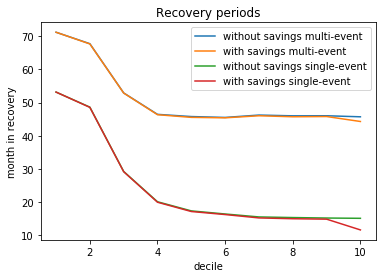

In [32]:
plt.plot(deciles, time_means_mev, label='without savings multi-event')
plt.plot(deciles, time_means_sm_mev, label='with savings multi-event')
plt.plot(deciles, time_means, label='without savings single-event')
plt.plot(deciles, time_means_sm, label='with savings single-event')
plt.title('Recovery periods')
plt.xlabel('decile')
plt.ylabel('month in recovery')
plt.legend()

Text(0, 0.5, 'difference in month in recovery')

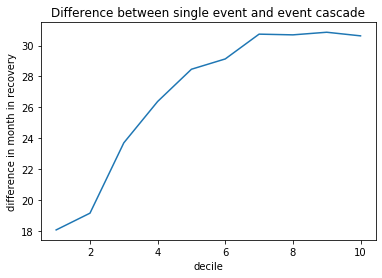

In [35]:
plt.plot(deciles, np.array(time_means_mev) - np.array(time_means))
plt.title('Difference between single event and event cascade')
plt.xlabel('decile')
plt.ylabel('difference in month in recovery')

The difference increases with decile because of the limited time period considered...

In [38]:
share_means_mev=[]
share_means_sm_mev=[]
for i, sh in enumerate(shares):
    share_means_mev.append(survey.loc[(survey['n_events']!=0) & (survey['share_sp']==sh), 'reco_time_mev'].mean())
    share_means_sm_mev.append(survey.loc[(survey['n_events']!=0) & (survey['share_sp']==sh), 'reco_time_mev_sav'].mean())  
len(share_means_sm_mev)

101

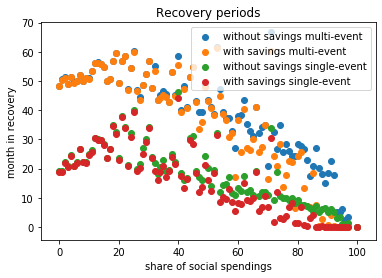

In [44]:
plt.scatter(shares, share_means_mev, label='without savings multi-event')
plt.scatter(shares, share_means_sm_mev, label='with savings multi-event')
plt.scatter(shares, share_means, label='without savings single-event')
plt.scatter(shares, share_means_sm, label='with savings single-event')
plt.title('Recovery periods')
plt.xlabel('share of social spendings')
plt.ylabel('month in recovery')
plt.legend()

Text(0.5, 0, 'recovery time month')

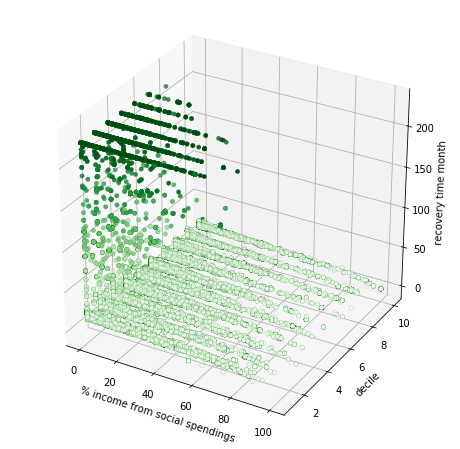

In [58]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

zdata = survey.loc[survey['n_events']>=1,'reco_time_sev']
xdata = survey.loc[survey['n_events']>=1,'share_sp']
ydata = survey.loc[survey['n_events']>=1,'decile']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens', edgecolor='green', linewidth=0.2)
ax.set_xlabel('% income from social spendings ')
ax.set_ylabel('decile')
ax.set_zlabel('recovery time month')

Text(0.5, 0, 'recovery time month')

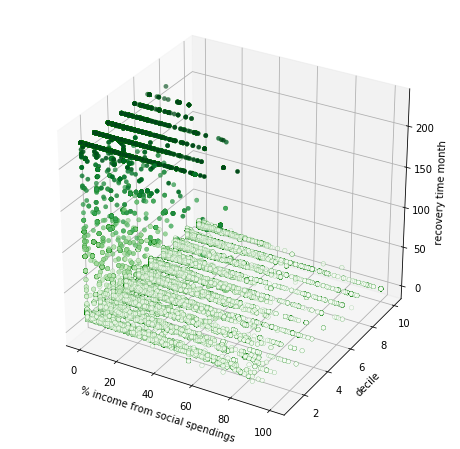

In [59]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

zdata = survey.loc[survey['n_events']>=1,'reco_time_sev_sav']
xdata = survey.loc[survey['n_events']>=1,'share_sp']
ydata = survey.loc[survey['n_events']>=1,'decile']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens', edgecolor='green', linewidth=0.2)
ax.set_xlabel('% income from social spendings ')
ax.set_ylabel('decile')
ax.set_zlabel('recovery time month')

Text(0.5, 0, 'recovery time month')

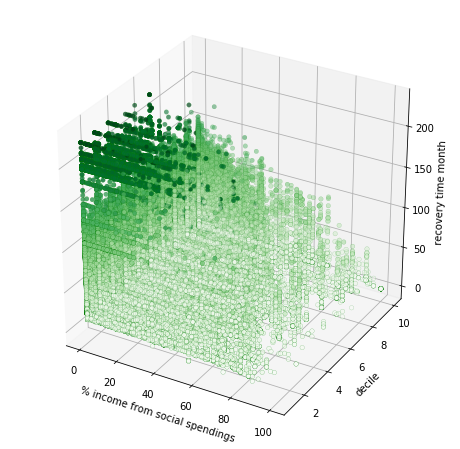

In [60]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

zdata = survey.loc[survey['n_events']>=1,'reco_time_mev']
xdata = survey.loc[survey['n_events']>=1,'share_sp']
ydata = survey.loc[survey['n_events']>=1,'decile']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens', edgecolor='green', linewidth=0.2)
ax.set_xlabel('% income from social spendings ')
ax.set_ylabel('decile')
ax.set_zlabel('recovery time month')

Text(0.5, 0, 'recovery time month')

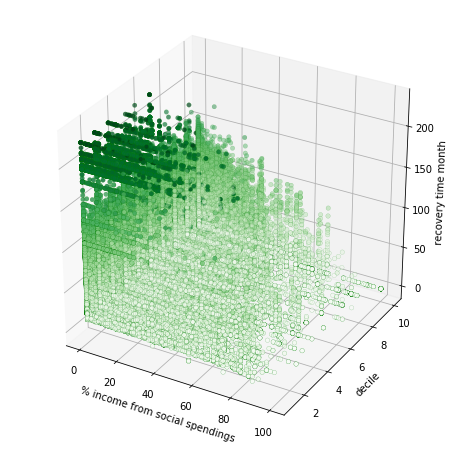

In [61]:
from mpl_toolkits import mplot3d
fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection='3d')

zdata = survey.loc[survey['n_events']>=1,'reco_time_mev_sav']
xdata = survey.loc[survey['n_events']>=1,'share_sp']
ydata = survey.loc[survey['n_events']>=1,'decile']
ax.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens', edgecolor='green', linewidth=0.2)
ax.set_xlabel('% income from social spendings ')
ax.set_ylabel('decile')
ax.set_zlabel('recovery time month')

Text(0.5, 0.92, 'Multiple Events')

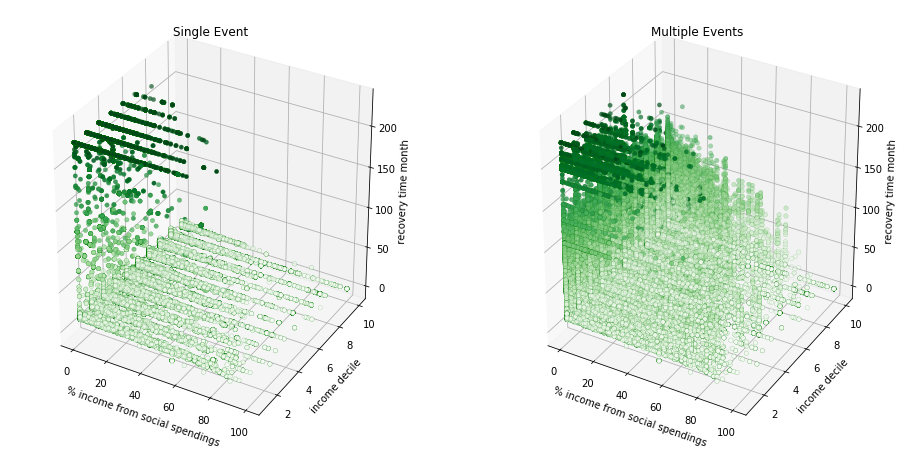

In [66]:
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1, 2, 1, projection='3d')

zdata = survey.loc[survey['n_events']>=1,'reco_time_sev_sav']
xdata = survey.loc[survey['n_events']>=1,'share_sp']
ydata = survey.loc[survey['n_events']>=1,'decile']
ax1.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens', edgecolor='green', linewidth=0.2)
ax1.set_xlabel('% income from social spendings ')
ax1.set_ylabel('income decile')
ax1.set_zlabel('recovery time month')
ax1.set_title('Single Event')

ax2 = fig.add_subplot(1, 2, 2, projection='3d')

zdata = survey.loc[survey['n_events']>=1,'reco_time_mev_sav']
xdata = survey.loc[survey['n_events']>=1,'share_sp']
ydata = survey.loc[survey['n_events']>=1,'decile']
ax2.scatter3D(xdata, ydata, zdata, c=zdata, cmap='Greens', edgecolor='green', linewidth=0.2)
ax2.set_xlabel('% income from social spendings ')
ax2.set_ylabel('income decile')
ax2.set_zlabel('recovery time month')
ax2.set_title('Multiple Events')

In [77]:
import numpy as np
col=0
add=10000
while add > 0:
    print(col)
    cols=ids_aff[col:col+add]
    cons_list=list(survey.loc[survey['fhhid'].isin(cols),'income']/13)
    df=pd.read_csv('/home/insauer/mnt/ebm/inga/hhwb/data/output_shocks/cons.csv', usecols=cols, header=None)
    df_sav=pd.read_csv('/home/insauer/mnt/ebm/inga/hhwb/data/output_shocks/cons_sm.csv', usecols=cols, header=None)
    diff= df.sub(df_sav)
    d_con_max=np.array(df.max())
    del df
    del df_sav
    for i,hhid in enumerate(cols):
        print(np.where(diff.loc[:,hhid]> 0.02)[0][-1])
        try:
            survey.loc[survey['fhhid'].isin(cols),'last_diff_sac']= np.where(diff.loc[:,hhid]> 0.02)[0][-1]
        except IndexError:
            survey.loc[survey['fhhid'].isin(cols),'last_diff_sac']= np.
    #df1=pd.read_csv('/home/mnt/ebm/inga/hhwb/data/output_shocks/wb_sm.csv', usecols=cols, header=None)
    #
    #print(df.max())
    if col+add>=len(ids_aff):
        add=len(ids_aff)-(col+add)
    else:
        add=10000
    col+=add

0
46
39
41
40
40
38
125
125
125
40


IndexError: index -1 is out of bounds for axis 0 with size 0